# Project on Data Sciences and Machine Learning

## Exploratory Data Analysis 

In [1138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.svm import SVR
# import various functions from sklearn 


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


# import function to perform feature selection
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


In [1139]:
# Load dataset
df = pd.read_csv('diabetic_data.csv')
df_original=df
# View first few rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [1140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [1141]:
df.shape

(101766, 50)

In [1142]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [1143]:
#Function to list features and details
def feature_summary(df,val_sum):
    summary_df = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Null Percentage' : round(df.isnull().sum() / df.shape[0] *100 , 2),
        'Unique Count': df.nunique(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })

    summary_df = summary_df.sort_values(by=val_sum, ascending=False)
    
    return summary_df

In [1144]:

feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5346,96420,94.75,3,NaN,NaN
A1Cresult,object,17018,84748,83.28,3,NaN,NaN
troglitazone,object,101766,0,0.00,2,NaN,NaN
number_inpatient,int64,101766,0,0.00,21,0.0,21.0
metformin-pioglitazone,object,101766,0,0.00,2,NaN,NaN
metformin-rosiglitazone,object,101766,0,0.00,2,NaN,NaN
miglitol,object,101766,0,0.00,4,NaN,NaN
nateglinide,object,101766,0,0.00,4,NaN,NaN
num_lab_procedures,int64,101766,0,0.00,118,1.0,132.0
num_medications,int64,101766,0,0.00,75,1.0,81.0


In [1145]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Data Set Description

### Features
encounter_id: Unique identifier of an encounter

patient_nbr: Unique identifier of a patient

race: Caucasian, Asian, African American, Hispanic, and other

gender: male, female, and unknown/invalid

age: in groups [0-10],[10.20],[20-30],[30-40] etc

weight: 96.86% of the population's 'weight' is not available and hence be dropped

admission_type_id

discharge_disposition_id

admission_source_id

time_in_hospital: number of days between admission and discharge

payer_code: The payer code is the one who pays to the hospital like medicare, self, etc.

medical_specialty: identifier of a specialty of the admitting physician

num_lab_procedures: Number of lab tests performed

num_procedures: Number of procedures (other than lab tests) performed

num_medications: Number of distinct medicationss administered

number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

number_emergency: Number of emergency visits of the patient in the year preceding the encounter

number_inpatient: Number of inpatient visits of the patient in the year preceding the encounter

diag_1: The primary diagnosis (coded as first three digits of ICD9)

diag_2: The secondary diagnosis (coded as first three digits of ICD9)

diag_3: The additional diagnosis (coded as first three digits of ICD9)

number_diagnoses: Number of diagnoses entered to the system 0%

max_glu_serum: Indicates the range of the result or if the test was not taken

A1Cresult: Indicates the range of the result or if the test was not taken

change: Indicates if there was a change in diabetic medications

diabetesMed: Indicates if there was any diabetic medication prescribed

### The dependent feature
readmitted : to see whether a patient was readmitted within 30 days or not

Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

### The below 23 features are medications Diabetes medications Indicates if there was any diabetic medication prescribed. 
metformin, 
repaglinide, 
nateglinide, 
chlorpropamide, 
glimepiride, 
acetohexamide, 
glipizide, 
glyburide, 
tolbutamide, 
pioglitazone, 
rosiglitazone, 
acarbose, 
miglitol, 
troglitazone, 
tolazamide, 
examide, 
citoglipton, 
insulin, 
glyburide-metformin, 
glipizide-metformin, 
glimepiride-pioglitazone, 
metformin-rosiglitazone, 
metformin-pioglitazone

## Data Dictionary

In [1146]:
df_ids = pd.read_csv('IDS_mapping.csv')
df_ids


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [1147]:
#Find duplicate instances

df.duplicated().value_counts() 

False    101766
Name: count, dtype: int64

There are no duplicate instances

In [1148]:
features=df.columns
features

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [1149]:
#There are features with '?' which are unknown
for col in features:
    if (df[col] == '?').any():
        print(col)


race
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3


In [1150]:
# Unknown values are recorded as '?' in dataset. Replacing with null
df.replace('?', np.nan, inplace=True)

In [1151]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
weight,object,3197,98569,96.86,9,NaN,NaN
max_glu_serum,object,5346,96420,94.75,3,NaN,NaN
A1Cresult,object,17018,84748,83.28,3,NaN,NaN
medical_specialty,object,51817,49949,49.08,72,NaN,NaN
payer_code,object,61510,40256,39.56,17,NaN,NaN
race,object,99493,2273,2.23,5,NaN,NaN
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
tolbutamide,object,101766,0,0.00,2,NaN,NaN


readmitted is the dependent feature  to see whether a patient was readmitted within 30 days or not

In [1152]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

<Axes: xlabel='readmitted'>

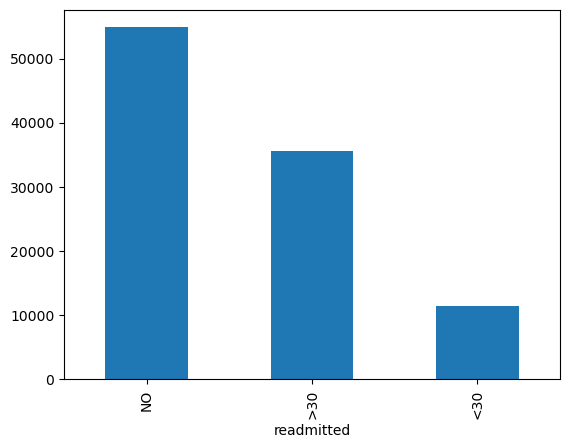

In [1153]:

df['readmitted'].value_counts().plot(kind='bar')

We can make two classes
1. readmitted within 30 days = 1 since we are predicting whehter the patient needs re admission within 30 days
2. Not readmitted within 30 days or no admission = 0

In [1154]:
def label(x):
    if x=='NO' or x=='>30':
        return 0
    elif x=='<30':
        return 1
df['readmitted'] = df['readmitted'].apply(label)

In [1155]:
# this function return a dataframe with total observations for each category within a feature
def val_counts(df, feature):
    dic = {}
    for x in df[feature].unique():
        dic[x] = [len(df[df[feature]==x]) , (len(df[df[feature]==x])/len(df))*100]
    data = pd.DataFrame.from_dict(dic,orient='index', columns=['Total observations','%age of total data'])
    return data.sort_values(by=['Total observations'], ascending=False)

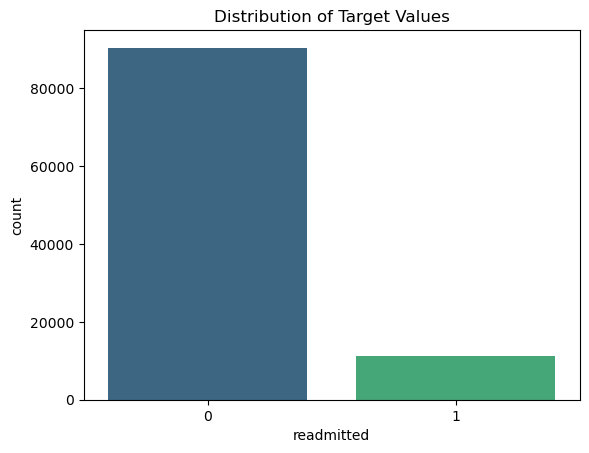

,Total observations,%age of total data
0,90409,88.840084
1,11357,11.159916


In [1156]:
sns.countplot(x = "readmitted", data = df,  palette='viridis')
plt.title("Distribution of Target Values")
plt.show()

val_counts(df,'readmitted')

Other features to drop
1. 96.86% of the population's 'weight' is not available
2. 'medical_specialty' and 'payer_code' are not available for about 50%.


In [1157]:
#Dropping features
df=df.drop(['weight','medical_specialty','payer_code'], axis = 1)


In [1158]:
feature_summary(df,'Unique Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
encounter_id,int64,101766,0,0.00,101766,12522.0,443867222.0
patient_nbr,int64,101766,0,0.00,71518,135.0,189502619.0
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
num_lab_procedures,int64,101766,0,0.00,118,1.0,132.0
num_medications,int64,101766,0,0.00,75,1.0,81.0
number_outpatient,int64,101766,0,0.00,39,0.0,42.0
number_emergency,int64,101766,0,0.00,33,0.0,76.0
discharge_disposition_id,int64,101766,0,0.00,26,1.0,28.0


The features to drop
1. all values of 'encounter_id' column are unique

In [1159]:
#df=df.drop(['citoglipton','examide','encounter_id'],axis=1)
df=df.drop(['encounter_id'],axis=1)

In [1160]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [1161]:
#this function returns a dataframe that contains the perccentage of each category of a particular feature that got readmitted
def category_ratio(feature):
    try:
        dic = {}
        for x in df[feature].unique():
            num = len(df[(df[feature]==x) & (df['readmitted']==1)])
            den = len(df[df[feature]==x])
            dic[x] = (num/den)*100
        data = pd.DataFrame.from_dict(dic,orient='index',columns=['%-age belonging to class 1'])
        return data.sort_values(by=['%-age belonging to class 1'], ascending=False)

    except ZeroDivisionError:
        # Handle ZeroDivisionError
        print("Cannot divide by zero.")


## Race

In [1162]:
df.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

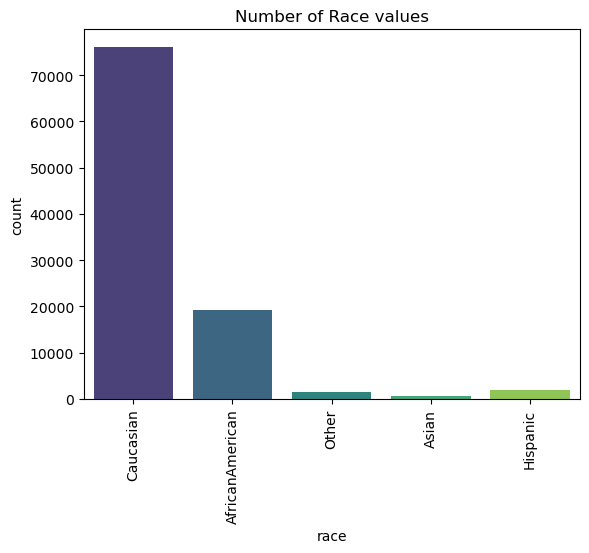

Proportion of Race
                 Total observations  %age of total data
Caucasian                     76099           74.778413
AfricanAmerican               19210           18.876639
Hispanic                       2037            2.001651
Other                          1506            1.479866
Asian                           641            0.629876
NaN                               0            0.000000


In [1163]:
sns.countplot(x=df.race, data = df, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(val_counts(df,'race'))


In [1164]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [1165]:
# Since the percentage of the races other than Caucasian and AricanAmerican is low, grouping all to Other including null

#df['race'] = df['race'].replace(['Hispanic', 'Asian', 'Other', np.NaN],'Other')
df['race'] = df['race'].replace(['Hispanic', 'Asian', 'Other'],'Other')

In [1166]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5346,96420,94.75,3,NaN,NaN
A1Cresult,object,17018,84748,83.28,3,NaN,NaN
race,object,99493,2273,2.23,3,NaN,NaN
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
patient_nbr,int64,101766,0,0.00,71518,135.0,189502619.0
nateglinide,object,101766,0,0.00,4,NaN,NaN
num_lab_procedures,int64,101766,0,0.00,118,1.0,132.0
num_medications,int64,101766,0,0.00,75,1.0,81.0


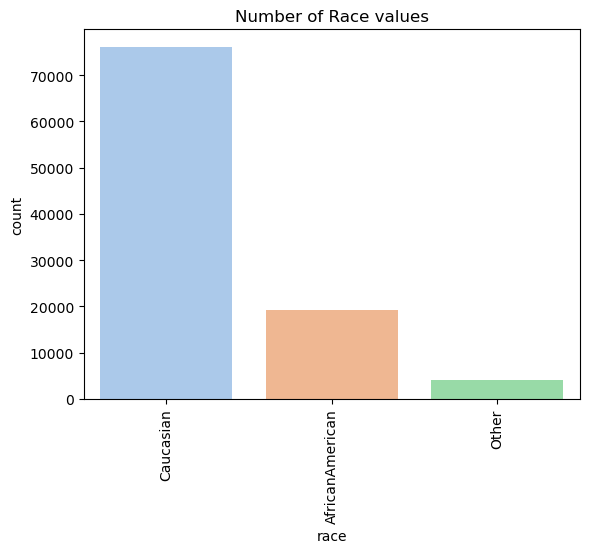

,Total observations,%age of total data
Caucasian,76099,74.778413
AfricanAmerican,19210,18.876639
Other,4184,4.111393
NaN,0,0.000000


In [1167]:
sns.countplot(x=df.race, data = df, palette='pastel')
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

val_counts(df,'race')

In [1168]:
df.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
Other               4184
NaN                 2273
Name: count, dtype: int64

There are 2273 instances without race which is 2.23% which is to be imputed with other values.

In [1169]:

# Define race categories and their proportions
categories = ['Caucasian', 'AfricanAmerican', 'Other']
proportions = [76099, 19210, 4184]
proportions = [p / sum(proportions) for p in proportions]

# Sample based on proportions
imputed = np.random.choice(categories, size=2273, p=proportions)

# Assign to missing entries
df.loc[df['race'].isna(), 'race'] = imputed

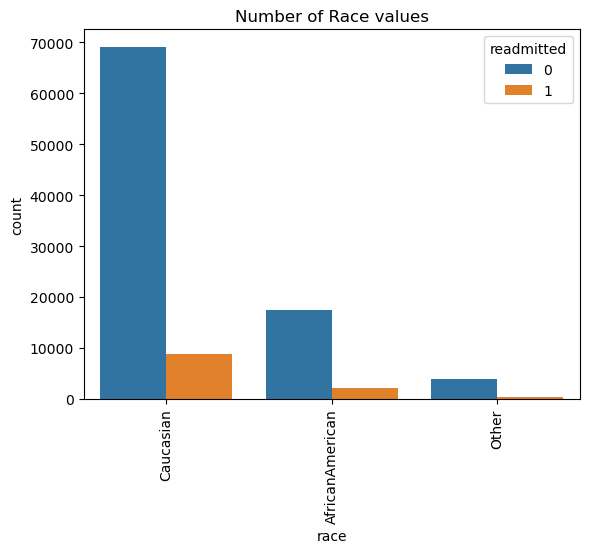

,%-age belonging to class 1
Caucasian,11.223244
AfricanAmerican,11.166455
Other,9.986066


In [1170]:
sns.countplot(x=df.race, data = df, hue='readmitted')
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

category_ratio('race')

We can see that the probability of readmission is almost equal

In [1171]:
feature_summary(df,'Unique Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
patient_nbr,int64,101766,0,0.00,71518,135.0,189502619.0
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
num_lab_procedures,int64,101766,0,0.00,118,1.0,132.0
num_medications,int64,101766,0,0.00,75,1.0,81.0
number_outpatient,int64,101766,0,0.00,39,0.0,42.0
number_emergency,int64,101766,0,0.00,33,0.0,76.0
discharge_disposition_id,int64,101766,0,0.00,26,1.0,28.0
number_inpatient,int64,101766,0,0.00,21,0.0,21.0


## Gender

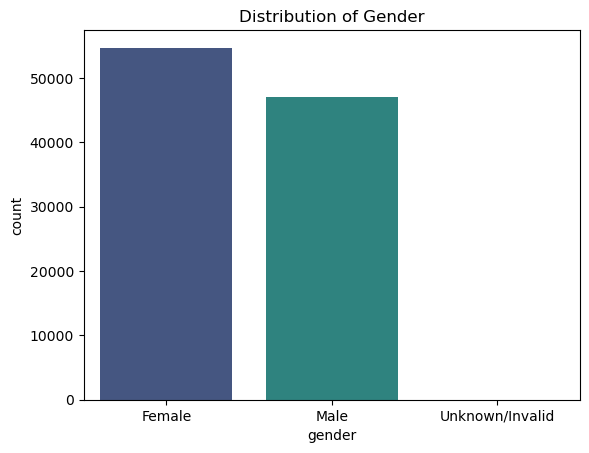

,Total observations,%age of total data
Female,54708,53.758623
Male,47055,46.238429
Unknown/Invalid,3,0.002948


In [1172]:
sns.countplot(x = "gender", data = df,palette='viridis')
plt.title("Distribution of Gender")
plt.show()

val_counts(df,'gender')

In [1173]:
#dropping the instances with 'Unknown/Invalid'
gender_index = df[df.gender == 'Unknown/Invalid'].index
df = df.drop(gender_index, axis=0)

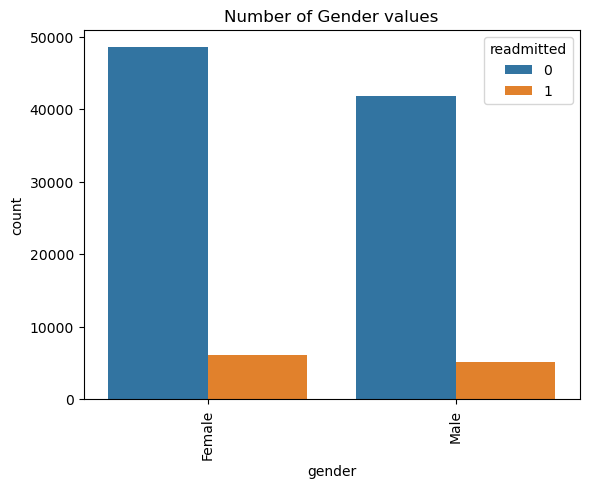

,%-age belonging to class 1
Female,11.245156
Male,11.061524


In [1174]:
sns.countplot(x=df.gender, data = df, hue='readmitted')
plt.xticks(rotation=90)
plt.title("Number of Gender values")
plt.show()

category_ratio('gender')

We can see that the probability of readmission is almost equal

## Age

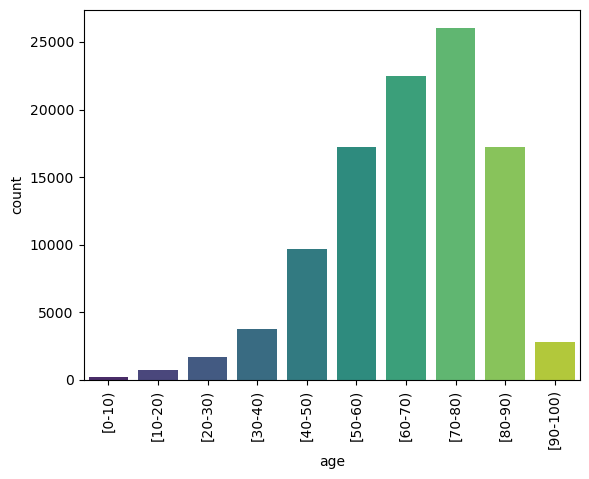

In [1175]:
sns.countplot(x="age", data = df, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

### To remove the parenthesis notation and make the Age variable a numeric value, used mean to change

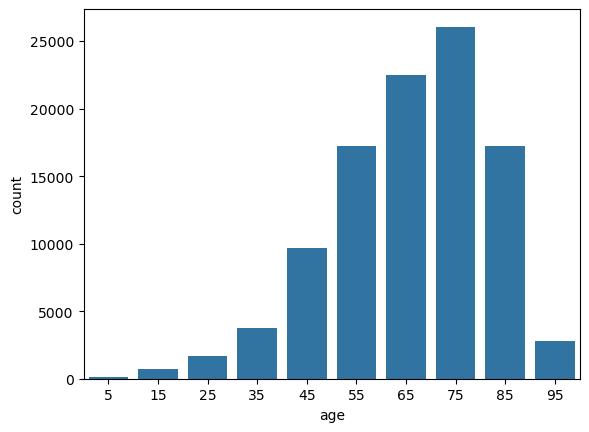

In [1176]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
#plt.xticks(rotation = 90)
plt.show()

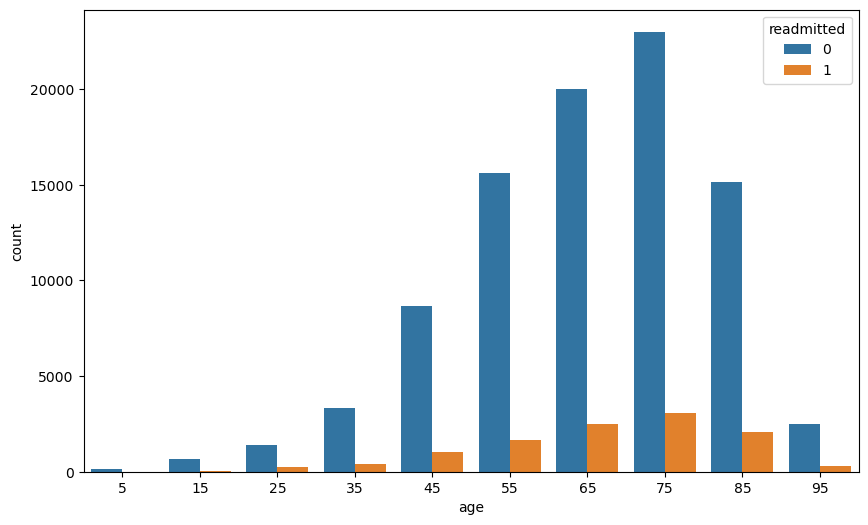

,%-age belonging to class 1
25,14.242607
85,12.083503
75,11.773958
35,11.231788
65,11.128903
95,11.099177
45,10.604027
55,9.666203
15,5.788712
5,1.863354


In [1177]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='readmitted', data=df)
plt.show()
category_ratio('age')

In [1178]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5346,96417,94.75,3,NaN,NaN
A1Cresult,object,17018,84745,83.28,3,NaN,NaN
diag_3,object,100340,1423,1.40,789,NaN,NaN
diag_2,object,101405,358,0.35,748,NaN,NaN
diag_1,object,101742,21,0.02,716,NaN,NaN
acetohexamide,object,101763,0,0.00,2,NaN,NaN
patient_nbr,int64,101763,0,0.00,71515,135.0,189502619.0
nateglinide,object,101763,0,0.00,4,NaN,NaN
num_lab_procedures,int64,101763,0,0.00,118,1.0,132.0
num_medications,int64,101763,0,0.00,75,1.0,81.0


In [1179]:
# total unique patients
len(df.patient_nbr), df.patient_nbr.nunique()

(101763, 71515)

In [1180]:
# locate number of patient visits using patient_id
df.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71515, dtype: int64

In [1181]:
df_ptnbr=df[df['patient_nbr']==88785891]
df_ptnbr[['readmitted','A1Cresult','number_inpatient']]

,readmitted,A1Cresult,number_inpatient
38307,0,NaN,0
40252,1,NaN,2
40661,0,NaN,3
44515,1,NaN,5
45147,1,NaN,6
45986,1,NaN,7
50167,1,NaN,9
50393,1,NaN,9
50773,1,NaN,10
51519,1,NaN,11


In [1182]:
df.patient_nbr.nunique()

71515

In [1183]:
df.shape

(101763, 46)

### 'patient_nbr' is almost unique, so we can drop this feature

In [1184]:
df = df.drop('patient_nbr', axis=1)

In [1185]:
df.shape

(101763, 45)

In [1186]:
feature_summary(df,'Unique Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
diag_3,object,100340,1423,1.40,789,NaN,NaN
diag_2,object,101405,358,0.35,748,NaN,NaN
diag_1,object,101742,21,0.02,716,NaN,NaN
num_lab_procedures,int64,101763,0,0.00,118,1.0,132.0
num_medications,int64,101763,0,0.00,75,1.0,81.0
number_outpatient,int64,101763,0,0.00,39,0.0,42.0
number_emergency,int64,101763,0,0.00,33,0.0,76.0
discharge_disposition_id,int64,101763,0,0.00,26,1.0,28.0
number_inpatient,int64,101763,0,0.00,21,0.0,21.0
admission_source_id,int64,101763,0,0.00,17,1.0,25.0


In [1187]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5346,96417,94.75,3,NaN,NaN
A1Cresult,object,17018,84745,83.28,3,NaN,NaN
diag_3,object,100340,1423,1.40,789,NaN,NaN
diag_2,object,101405,358,0.35,748,NaN,NaN
diag_1,object,101742,21,0.02,716,NaN,NaN
number_inpatient,int64,101763,0,0.00,21,0.0,21.0
metformin-rosiglitazone,object,101763,0,0.00,2,NaN,NaN
miglitol,object,101763,0,0.00,4,NaN,NaN
nateglinide,object,101763,0,0.00,4,NaN,NaN
num_lab_procedures,int64,101763,0,0.00,118,1.0,132.0


In [1188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


diag_1, diag_2 and diag_3 contain ICD9 codes and there are many unique codes. We will group into diagnosis groups.
Group Names are
1-Circulatory
2-Respiratory
3-Digestive
4-Diabetes
5-Injury
6-Musculoskeletal
7-Genitourinary
8-Neoplasms
9-Other

Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record
https://onlinelibrary.wiley.com/doi/10.1155/2014/781670

Table 2. Values of the primary diagnosis in the final dataset. In the analysis, groups that covered less than 3.5% of encounters were grouped into “other” category.


Text(0.5, 0, 'ICD-9 Diagnosis Code')

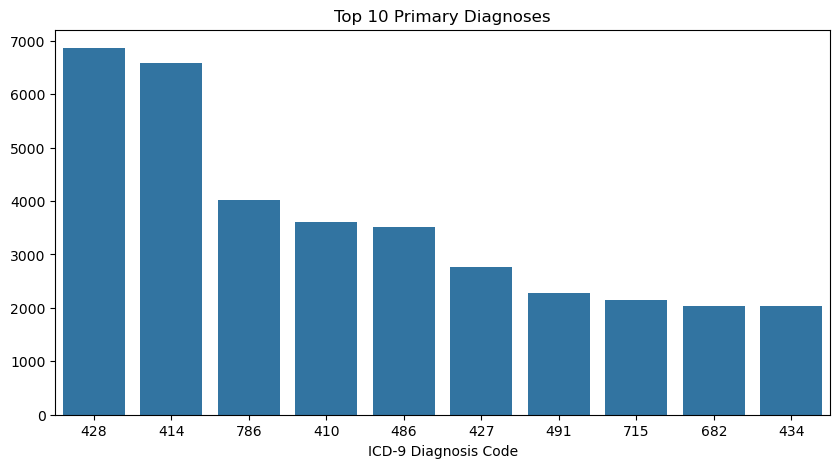

In [1189]:
top_diag1 = df['diag_1'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_diag1.index.astype(str), y=top_diag1.values)
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')

In [1190]:
df['diag_1'].nunique()

716

In [1191]:
#Classification of ICD-9 Codes (International Classification of Diseases)

#function to categorize
def cat_diag(code):
    
    try:
        code_num = int(float(code))  # convert to integer
    except ValueError:
        return 'Other'
        
    if code.startswith('250'):
        return 'Diabetes'
    if 390 <= code_num <= 459 or code_num == 785:
        return 'Circulatory'
    elif 460 <= code_num <= 519 or code_num == 786:
        return 'Respiratory'
    elif 520 <= code_num <= 579 or code_num == 787:
        return 'Digestive'
    elif 580 <= code_num <= 629 or code_num == 788:
        return 'Genitourinary'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal'
    elif 800 <= code_num <= 999:
        return 'Injury'
    else:
        return 'Other'

# Apply the function
df['diag_1'] = df['diag_1'].apply(cat_diag)
df['diag_2'] = df['diag_2'].apply(cat_diag)
df['diag_3'] = df['diag_3'].apply(cat_diag)

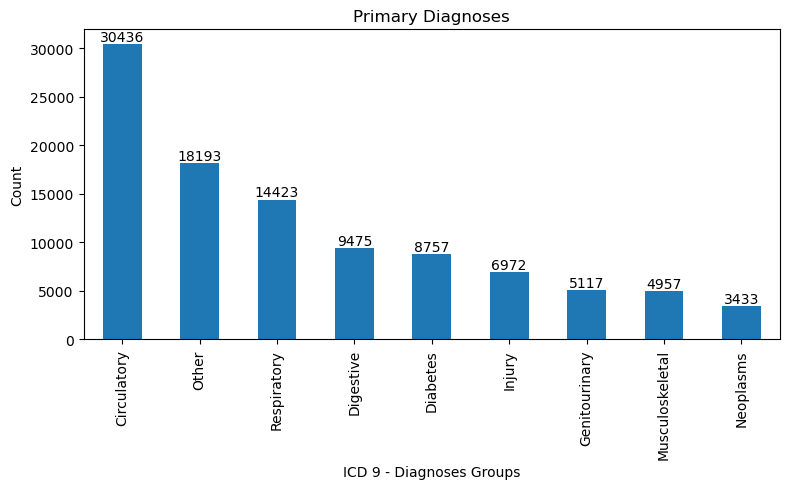

In [1192]:

# Get value counts
diag_counts = df['diag_1'].value_counts()

# Create bar plot and capture Axes
ax = diag_counts.plot(kind='bar', title='Primary Diagnoses', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(diag_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('ICD 9 - Diagnoses Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

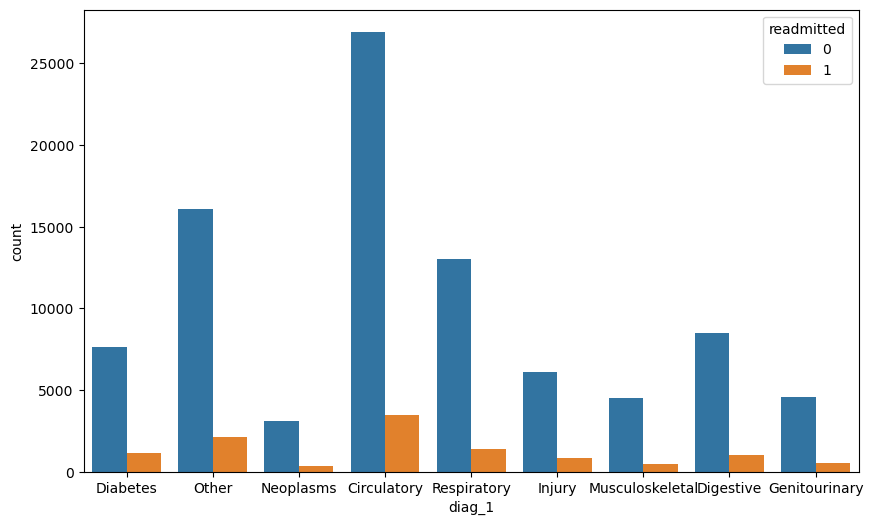

,%-age belonging to class 1
Diabetes,12.983899
Injury,12.248996
Other,11.493432
Circulatory,11.450256
Genitourinary,10.846199
Digestive,10.712401
Neoplasms,10.078648
Respiratory,9.727519
Musculoskeletal,9.501715


In [1193]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='diag_1', hue='readmitted', data=df)
plt.show()
category_ratio('diag_1')

In [1194]:
df[['diag_1', 'diag_2', 'diag_3']].head()

,diag_1,diag_2,diag_3
0,Diabetes,Other,Other
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes


In [1195]:
for i in df[['diag_1', 'diag_2', 'diag_3']]:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

diag_1:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diag_2:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diag_3:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']



In [1196]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5346,96417,94.75,3,NaN,NaN
A1Cresult,object,17018,84745,83.28,3,NaN,NaN
metformin-pioglitazone,object,101763,0,0.00,2,NaN,NaN
metformin-rosiglitazone,object,101763,0,0.00,2,NaN,NaN
miglitol,object,101763,0,0.00,4,NaN,NaN
nateglinide,object,101763,0,0.00,4,NaN,NaN
num_lab_procedures,int64,101763,0,0.00,118,1.0,132.0
num_medications,int64,101763,0,0.00,75,1.0,81.0
num_procedures,int64,101763,0,0.00,7,0.0,6.0
number_diagnoses,int64,101763,0,0.00,16,1.0,16.0


In [1197]:
df.shape

(101763, 45)

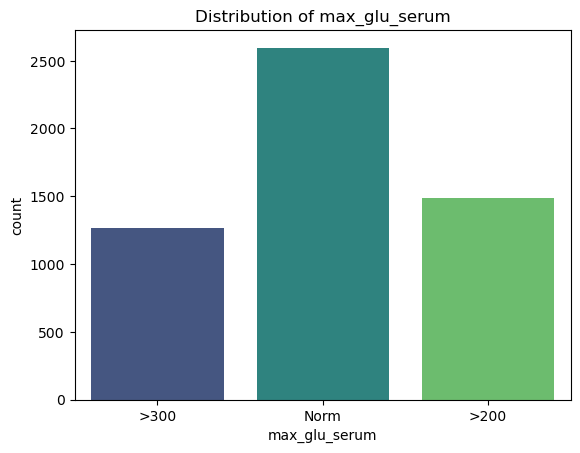

,Total observations,%age of total data
Norm,2597,2.552008
>200,1485,1.459273
>300,1264,1.242102
NaN,0,0.000000


In [1198]:
sns.countplot(x = 'max_glu_serum', data = df,palette='viridis')
plt.title('Distribution of max_glu_serum')
plt.show()

val_counts(df,'max_glu_serum')

In [1199]:
df.max_glu_serum.value_counts(dropna=False)

max_glu_serum
NaN     96417
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [1200]:
df['max_glu_serum']=df['max_glu_serum'].replace({np.NaN:0,"None":0, 'Norm':1, '>200':2, '>300':2})

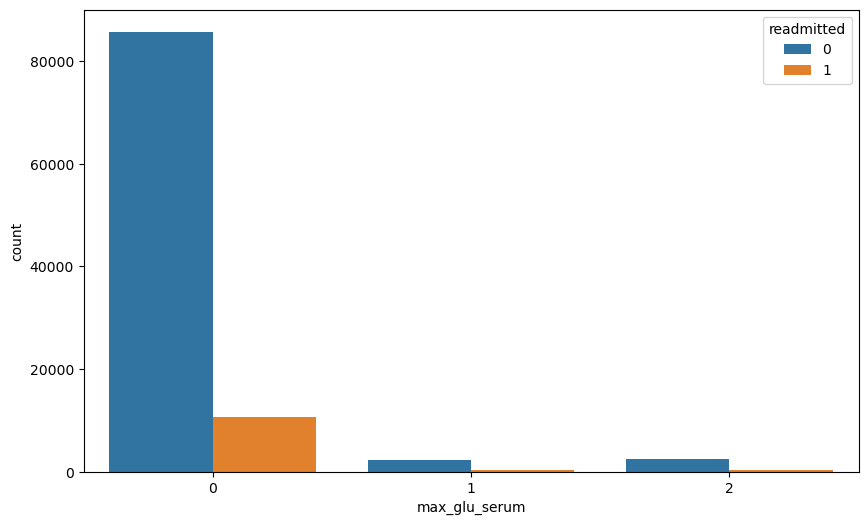

,%-age belonging to class 1
2,13.313932
1,11.359261
0,11.093479


In [1201]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
plt.show()
category_ratio('max_glu_serum')

In [1202]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
A1Cresult,object,17018,84745,83.28,3,NaN,NaN
max_glu_serum,int64,101763,0,0.00,3,0.0,2.0
metformin-pioglitazone,object,101763,0,0.00,2,NaN,NaN
metformin-rosiglitazone,object,101763,0,0.00,2,NaN,NaN
miglitol,object,101763,0,0.00,4,NaN,NaN
nateglinide,object,101763,0,0.00,4,NaN,NaN
num_lab_procedures,int64,101763,0,0.00,118,1.0,132.0
num_medications,int64,101763,0,0.00,75,1.0,81.0
num_procedures,int64,101763,0,0.00,7,0.0,6.0
number_diagnoses,int64,101763,0,0.00,16,1.0,16.0


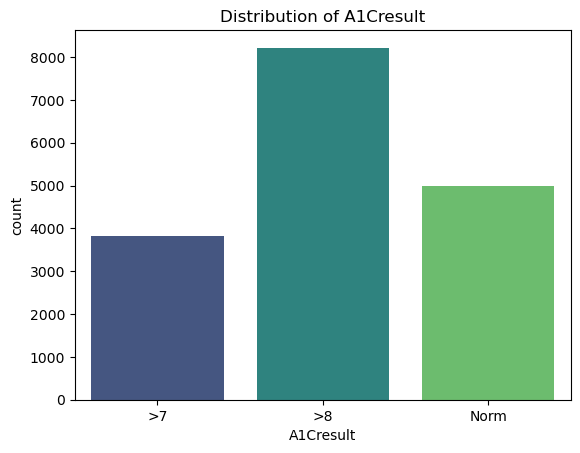

,Total observations,%age of total data
>8,8216,8.073661
Norm,4990,4.903550
>7,3812,3.745959
NaN,0,0.000000


In [1203]:
sns.countplot(x = 'A1Cresult', data = df,palette='viridis')
plt.title('Distribution of A1Cresult')
plt.show()

val_counts(df,'A1Cresult')

In [1204]:
df.A1Cresult.value_counts(dropna=False)

A1Cresult
NaN     84745
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

In [1205]:
df['A1Cresult']=df['A1Cresult'].replace({np.NaN:0, 'Norm':1, '>7':2, '>8':2})

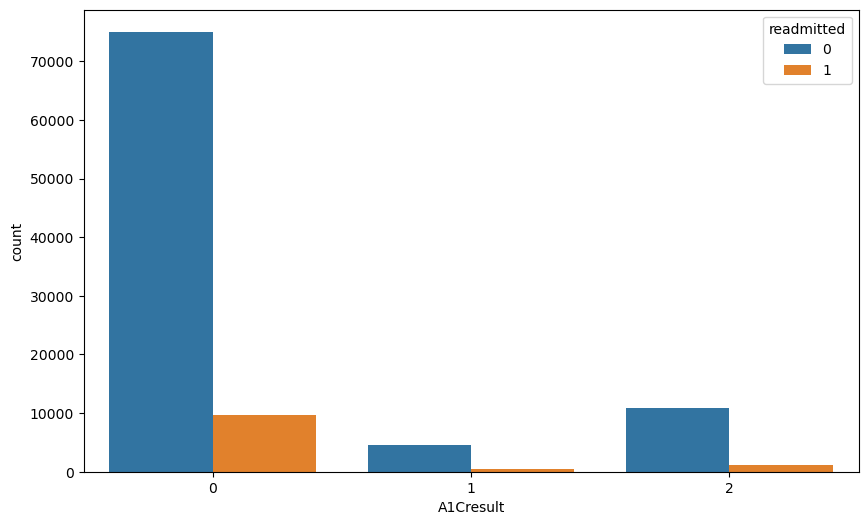

,%-age belonging to class 1
0,11.423683
2,9.926837
1,9.659319


In [1206]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
plt.show()
category_ratio('A1Cresult')

In [1207]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
A1Cresult,int64,101763,0,0.0,3,0.0,2.0
max_glu_serum,int64,101763,0,0.0,3,0.0,2.0
metformin-pioglitazone,object,101763,0,0.0,2,NaN,NaN
metformin-rosiglitazone,object,101763,0,0.0,2,NaN,NaN
miglitol,object,101763,0,0.0,4,NaN,NaN
nateglinide,object,101763,0,0.0,4,NaN,NaN
num_lab_procedures,int64,101763,0,0.0,118,1.0,132.0
num_medications,int64,101763,0,0.0,75,1.0,81.0
num_procedures,int64,101763,0,0.0,7,0.0,6.0
number_diagnoses,int64,101763,0,0.0,16,1.0,16.0


In [1208]:
feature_summary(df,'Data Type')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
insulin,object,101763,0,0.0,4,NaN,NaN
miglitol,object,101763,0,0.0,4,NaN,NaN
glyburide,object,101763,0,0.0,4,NaN,NaN
glyburide-metformin,object,101763,0,0.0,4,NaN,NaN
acarbose,object,101763,0,0.0,4,NaN,NaN
metformin,object,101763,0,0.0,4,NaN,NaN
metformin-pioglitazone,object,101763,0,0.0,2,NaN,NaN
metformin-rosiglitazone,object,101763,0,0.0,2,NaN,NaN
nateglinide,object,101763,0,0.0,4,NaN,NaN
glipizide,object,101763,0,0.0,4,NaN,NaN


In [1209]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [1210]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## admission_type_id

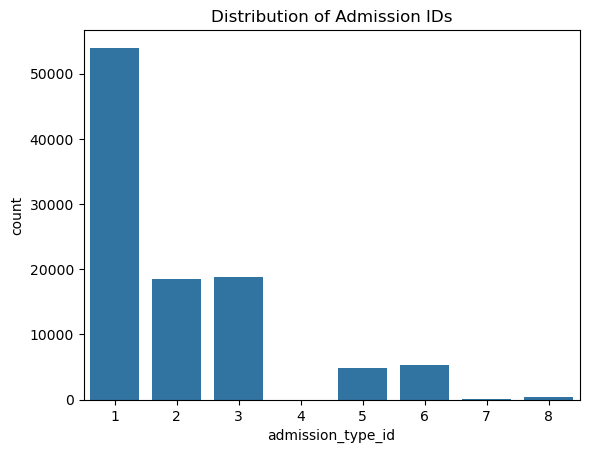

,Total observations,%age of total data
1,53988,53.052681
3,18868,18.541120
2,18480,18.159842
6,5291,5.199336
5,4785,4.702102
8,320,0.314456
7,21,0.020636
4,10,0.009827


In [1211]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

val_counts(df,"admission_type_id")

In [1212]:
df_ids.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


Map 1&2 to Emergency, 3 - Elective, 4 - Newborn, 5,6,8,Nan to np.Nan

In [1213]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0: np.nan,
          6.0: np.nan,
          7.0:"Trauma Center",
          8.0: np.nan}

df.admission_type_id = df.admission_type_id.replace(mapped)

In [1214]:
df.admission_type_id.value_counts(dropna=False)

admission_type_id
Emergency        72468
Elective         18868
NaN              10396
Trauma Center       21
New Born            10
Name: count, dtype: int64

In [1215]:
# Define race categories and their proportions
categories = ['Emergency', 'Elective', 'New Born','Trauma Center']
proportions = [72468, 18868, 10, 21]
proportions = [p / sum(proportions) for p in proportions]

# Sample based on proportions
imputed = np.random.choice(categories, size=10396, p=proportions)

# Assign to missing entries
df.loc[df['admission_type_id'].isna(), 'admission_type_id'] = imputed

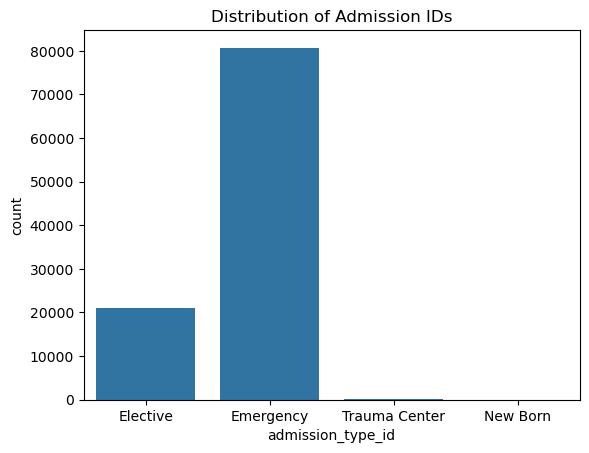

,Total observations,%age of total data
Emergency,80749,79.350058
Elective,20979,20.615548
Trauma Center,24,0.023584
New Born,11,0.010809


In [1216]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

val_counts(df,"admission_type_id")

In [1217]:
df.admission_type_id.value_counts(dropna=False)

admission_type_id
Emergency        80749
Elective         20979
Trauma Center       24
New Born            11
Name: count, dtype: int64

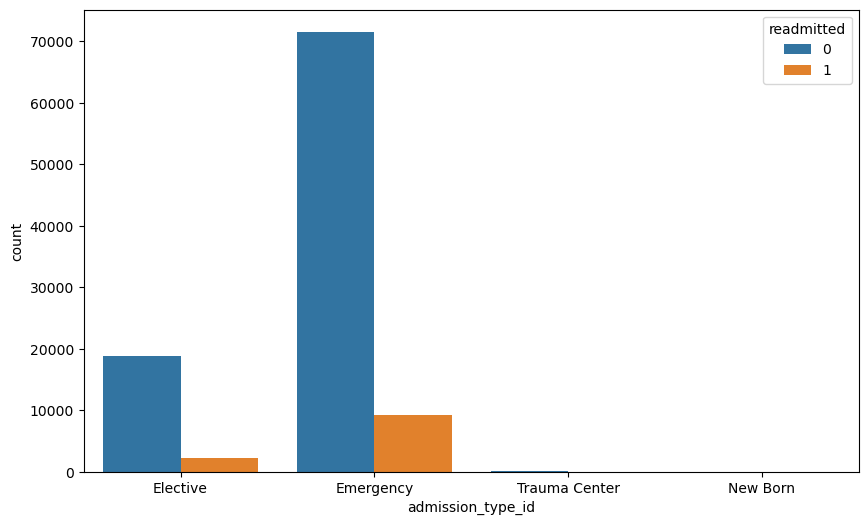

,%-age belonging to class 1
Emergency,11.369800
Elective,10.367510
New Born,9.090909
Trauma Center,0.000000


In [1218]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df)
plt.show()
category_ratio('admission_type_id')

## discharge_disposition_id

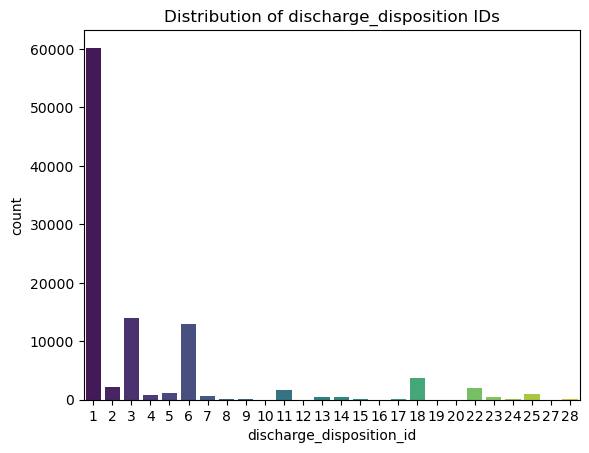

Distribution of ID's


,Total observations,%age of total data
1,60232,59.188507
3,13954,13.712253
6,12902,12.678478
18,3691,3.627055
2,2128,2.091133
22,1992,1.957489
11,1642,1.613553
5,1184,1.163488
25,989,0.971866
4,815,0.800880


In [1219]:
sns.countplot(x = "discharge_disposition_id", data = df, palette='viridis')
plt.title("Distribution of discharge_disposition IDs")
plt.show()

print("Distribution of ID's")
val_counts(df,"discharge_disposition_id")

In [1220]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [1221]:
df_ids.iloc[10:40]

,admission_type_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [1222]:
mapped_d = {1:'Discharged to home', 6:'Discharged to home', 8:'Discharged to home',13:'Discharged to home', 19:'Discharged to home',
            18:np.nan,25:np.nan, 26:np.nan,
            11:'Expired',19:'Expired', 20:'Expired', 21:'Expired',
            2:'Discharged to Other', 3:'Discharged to Other', 4:'Discharged to Other',5:'Discharged to Other',7:'Discharged to Other',
            9:'Discharged to Other', 10:'Discharged to Other', 14:'Discharged to Other',16:'Discharged to Other',22:'Discharged to Other',
            23:'Discharged to Other', 24:'Discharged to Other', 27:'Discharged to Other', 28:'Discharged to Other', 29:'Discharged to Other',
            30:'Discharged to Other',
            12:'Expected back', 15:'Expected back', 17:'Expected back'
}

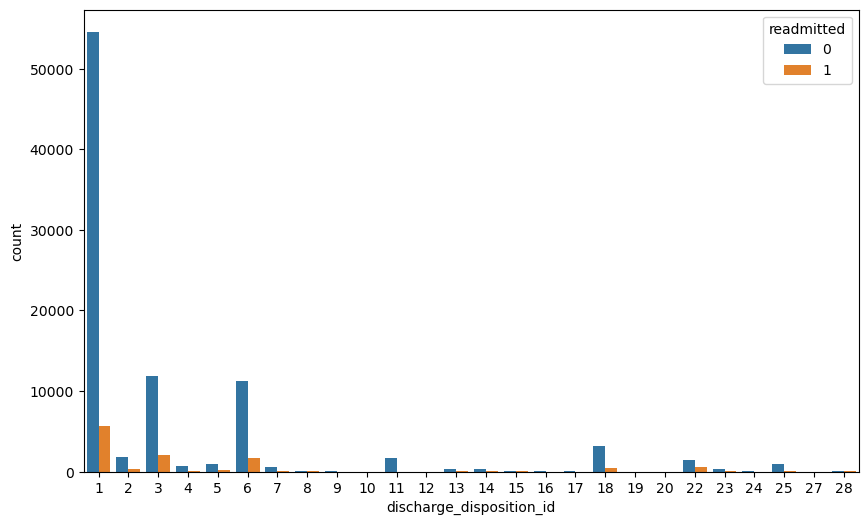

,%-age belonging to class 1
12,66.666667
15,44.444444
9,42.857143
28,36.690647
22,27.710843
5,20.861486
2,16.071429
3,14.662462
24,14.583333
7,14.446228


In [1223]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df)
plt.show()
category_ratio('discharge_disposition_id')

In [1224]:


df.discharge_disposition_id = df.discharge_disposition_id.replace(mapped_d)

In [1225]:
df['discharge_disposition_id'].unique()

array([nan, 'Discharged to home', 'Discharged to Other', 'Expired',
       'Expected back'], dtype=object)

In [1226]:
df.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
Discharged to home     73641
Discharged to Other    21710
NaN                     4680
Expired                 1652
Expected back             80
Name: count, dtype: int64

In [1227]:
# Define race categories and their proportions
categories = ['Discharged to home', 'Discharged to Other', 'Expired','Expected back']
proportions = [73641, 21710, 1652, 280]
proportions = [p / sum(proportions) for p in proportions]

# Sample based on proportions
imputed = np.random.choice(categories, size=4680, p=proportions)

# Assign to missing entries
df.loc[df['discharge_disposition_id'].isna(), 'discharge_disposition_id'] = imputed

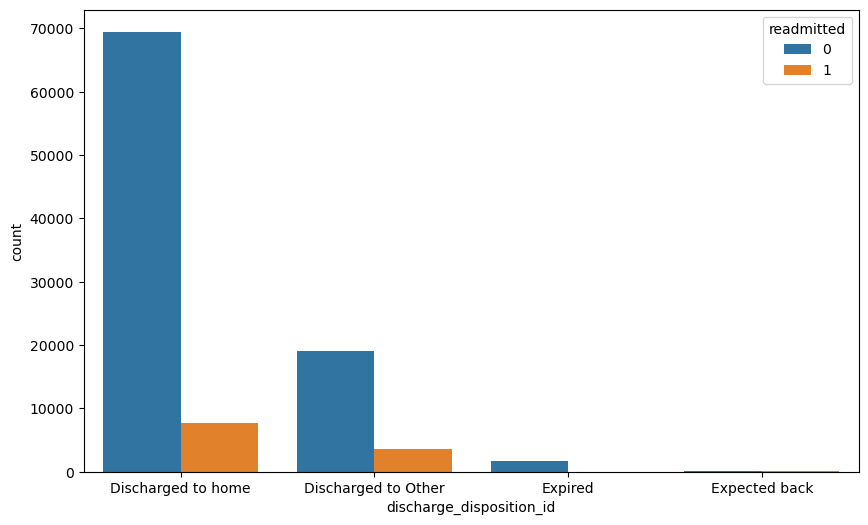

,%-age belonging to class 1
Expected back,32.978723
Discharged to Other,15.907190
Discharged to home,9.979794
Expired,0.457143


In [1228]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df)
plt.show()
category_ratio('discharge_disposition_id')

In [1229]:
val_counts(df,'discharge_disposition_id')

,Total observations,%age of total data
Discharged to home,77206,75.868439
Discharged to Other,22713,22.319507
Expired,1750,1.719682
Expected back,94,0.092371


## admission_source_id

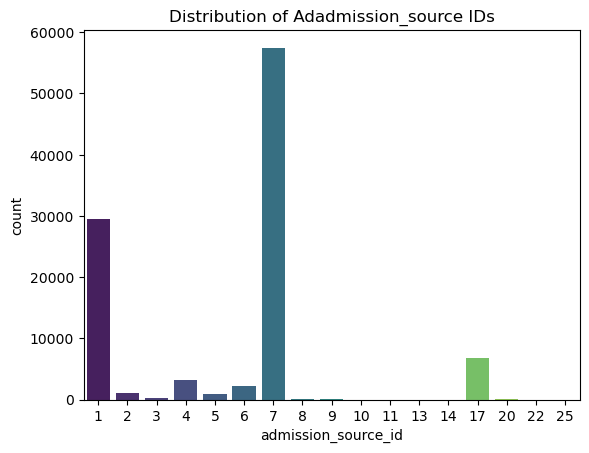

Distribution of ID's


,Total observations,%age of total data
7,57492,56.495976
1,29564,29.051816
17,6781,6.663522
4,3187,3.131787
6,2264,2.224777
2,1104,1.084874
5,855,0.840187
3,187,0.183760
20,161,0.158211
9,125,0.122834


In [1230]:
sns.countplot(x = "admission_source_id", data = df, palette='viridis')
plt.title("Distribution of Adadmission_source IDs")
plt.show()

print("Distribution of ID's")
val_counts(df,'admission_source_id')

In [1231]:
df_ids.iloc[41:]

,admission_type_id,description
41,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available


In [1232]:
mapped_a = {1:'Referral', 2:'Referral', 3:'Referral',
            4:'Transfer', 5:'Transfer', 6:'Transfer',10:'Transfer', 18:'Transfer', 22:'Transfer', 25:'Transfer', 26:'Transfer',24:'Transfer',
            9:np.nan, 15:np.nan, 17:np.nan, 20:np.nan,21:np.nan,
            7:'Emergency',
            8:'Other', 11:'Other',12:'Other', 13:'Other', 14:'Other', 19:'Other', 23:'Other'
}

In [1233]:
df.admission_source_id = df.admission_source_id.replace(mapped_a)

In [1234]:
df.admission_source_id.value_counts(dropna=False)

admission_source_id
Emergency    57492
Referral     30855
NaN           7067
Transfer      6328
Other           21
Name: count, dtype: int64

In [1235]:
# Define race categories and their proportions
categories = ['Emergency', 'Referral', 'Transfer','Other']
proportions = [57492, 30855, 6328, 21]
proportions = [p / sum(proportions) for p in proportions]

# Sample based on proportions
imputed = np.random.choice(categories, size=7067, p=proportions)

# Assign to missing entries
df.loc[df['admission_source_id'].isna(), 'admission_source_id'] = imputed

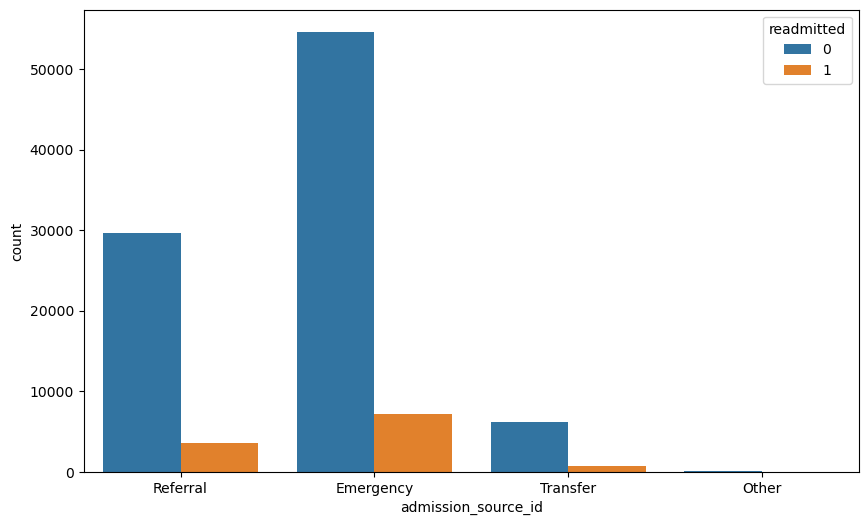

,%-age belonging to class 1
Emergency,11.585317
Referral,10.625075
Transfer,9.908582
Other,9.090909


In [1236]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='admission_source_id', hue='readmitted', data=df)
plt.show()
category_ratio('admission_source_id')

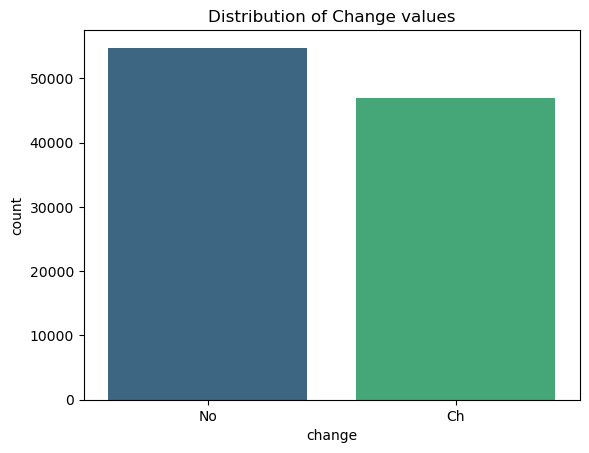

Distribution of change


,Total observations,%age of total data
No,54754,53.805411
Ch,47009,46.194589


In [1237]:
sns.countplot(x = "change", data = df, palette='viridis')
plt.title("Distribution of Change values")
plt.show()

print("Distribution of change")
val_counts(df,"change")

In [1238]:
df.change = df.change.replace("Ch","Yes")

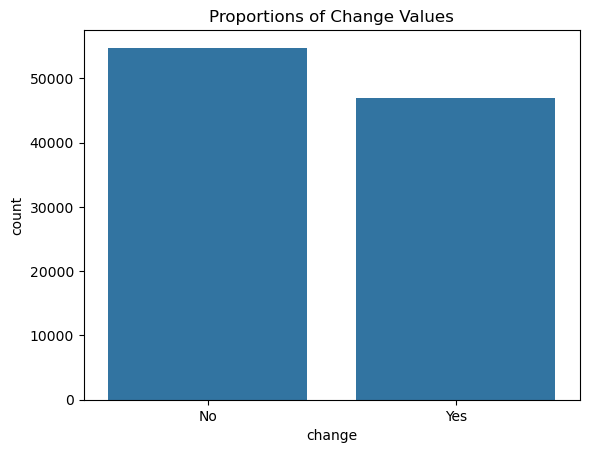

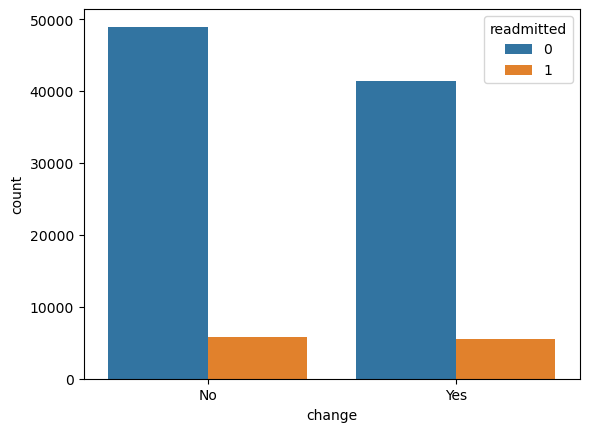

,%-age belonging to class 1
Yes,11.823268
No,10.591007


In [1239]:
sns.countplot(x = "change", data = df)
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "change", hue = "readmitted", data = df)
plt.show()
category_ratio('change')

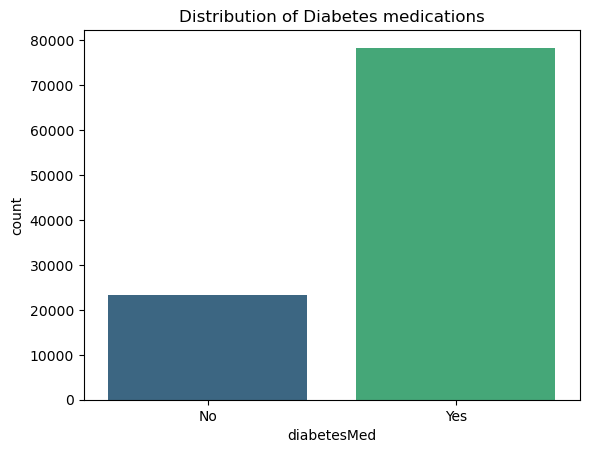

Distribution of change


,Total observations,%age of total data
Yes,78361,77.00343
No,23402,22.99657


In [1240]:
sns.countplot(x = "diabetesMed", data = df, palette='viridis')
plt.title("Distribution of Diabetes medications")
plt.show()

print("Distribution of change")
val_counts(df,"diabetesMed")

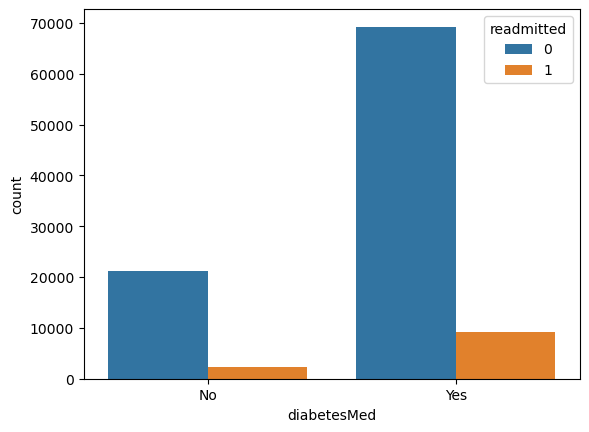

,%-age belonging to class 1
Yes,11.626957
No,9.597470


In [1241]:
sns.countplot(x = "diabetesMed", hue = "readmitted", data = df)
plt.show()
category_ratio('diabetesMed')

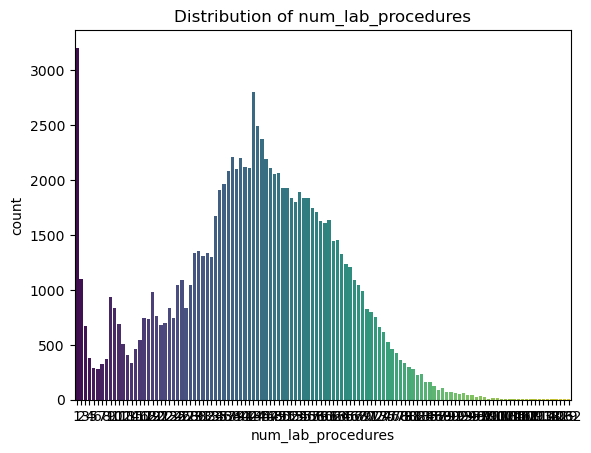

,Total observations,%age of total data
1,3208,3.152423
43,2804,2.755422
44,2496,2.452758
45,2376,2.334837
38,2212,2.173678
...,...,...
120,1,0.000983
132,1,0.000983
121,1,0.000983
126,1,0.000983


In [1242]:
sns.countplot(x = 'num_lab_procedures', data = df,palette='viridis')
plt.title('Distribution of num_lab_procedures')
plt.show()

val_counts(df,'num_lab_procedures')

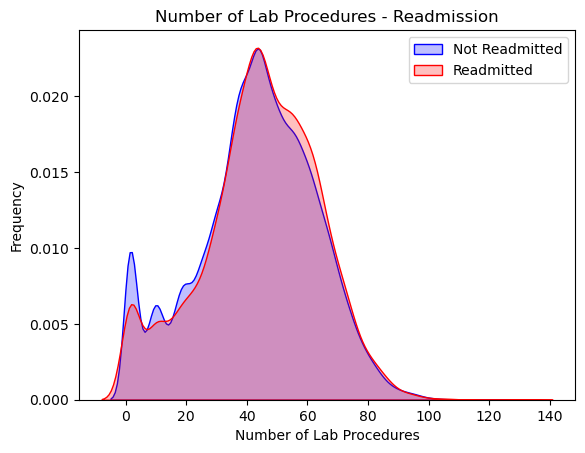

In [1243]:
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

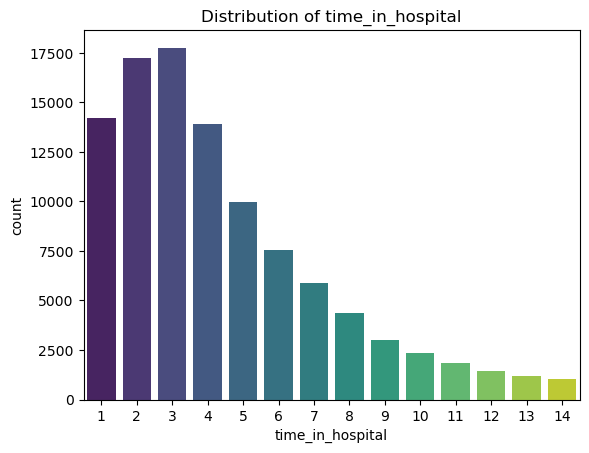

,Total observations,%age of total data
3,17756,17.448385
2,17224,16.925602
1,14206,13.959887
4,13924,13.682773
5,9966,9.793343
6,7539,7.408390
7,5859,5.757495
8,4390,4.313945
9,3002,2.949992
10,2342,2.301426


In [1244]:
sns.countplot(x = 'time_in_hospital', data = df,palette='viridis')
plt.title('Distribution of time_in_hospital')
plt.show()

val_counts(df,'time_in_hospital')

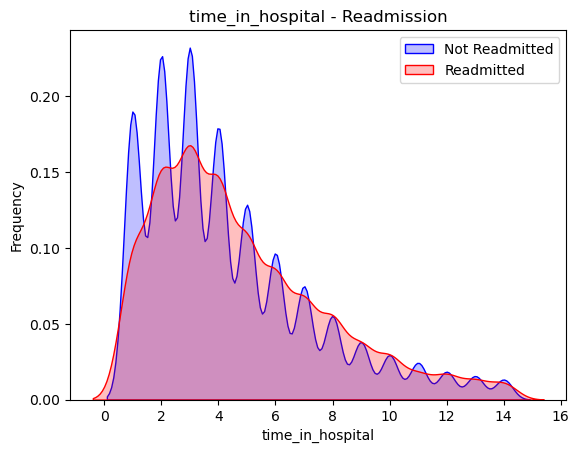

In [1245]:
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True,label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("time_in_hospital")
ax.set_ylabel("Frequency")
ax.set_title("time_in_hospital - Readmission")

plt.show()

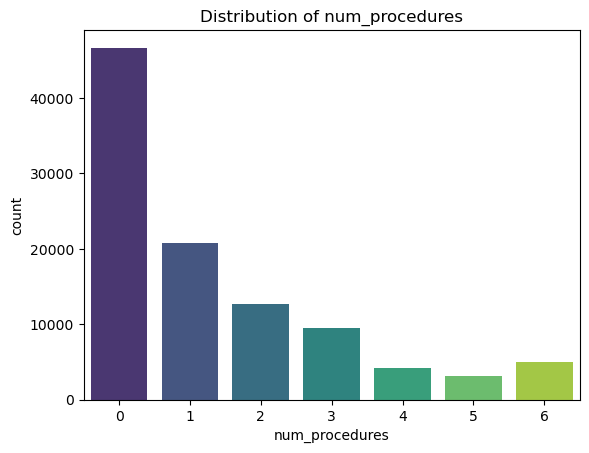

,Total observations,%age of total data
0,46652,45.843774
1,20741,20.381671
2,12716,12.495701
3,9443,9.279404
6,4954,4.868174
4,4180,4.107583
5,3077,3.023692


In [1246]:
sns.countplot(x = 'num_procedures', data = df,palette='viridis')
plt.title('Distribution of num_procedures')
plt.show()

val_counts(df,'num_procedures')

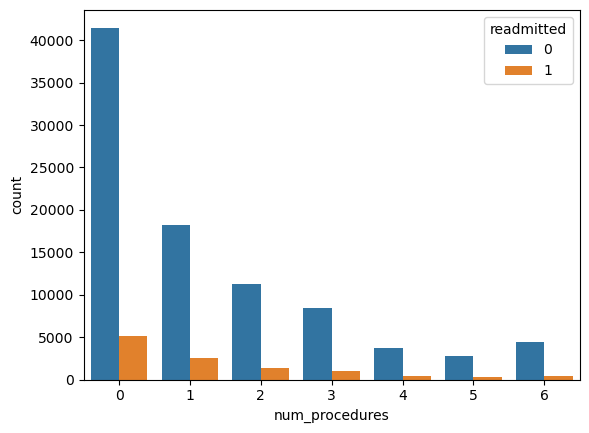

,%-age belonging to class 1
1,12.207705
2,11.182762
0,11.077767
4,11.028708
3,10.685164
6,9.588212
5,9.424764


In [1247]:
sns.countplot(x = "num_procedures", hue = "readmitted", data = df)
plt.show()
category_ratio('num_procedures')

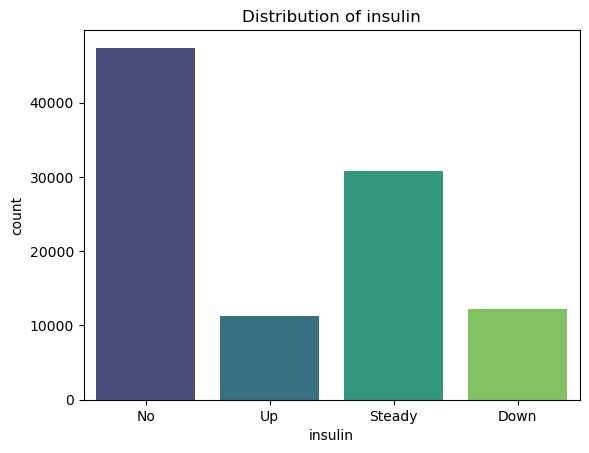

,Total observations,%age of total data
No,47380,46.559162
Steady,30849,30.314554
Down,12218,12.006328
Up,11316,11.119955


In [1248]:
sns.countplot(x = 'insulin', data = df,palette='viridis')
plt.title('Distribution of insulin')
plt.show()

val_counts(df,'insulin')

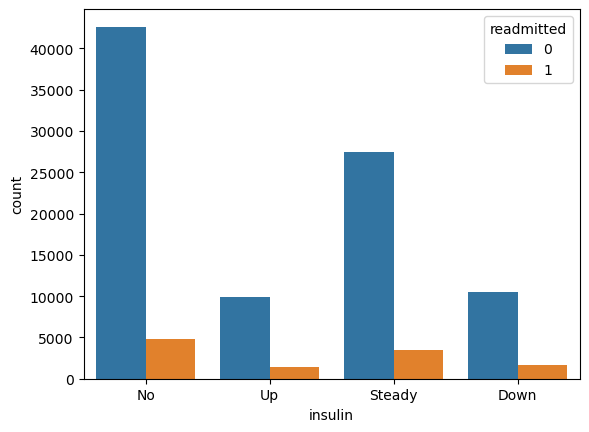

,%-age belonging to class 1
Down,13.897528
Up,12.990456
Steady,11.128400
No,10.037991


In [1249]:
sns.countplot(x = "insulin", hue = "readmitted", data = df)
plt.show()
category_ratio('insulin')

## Number of Medications
### Number of distinct generic names administered during the encounter

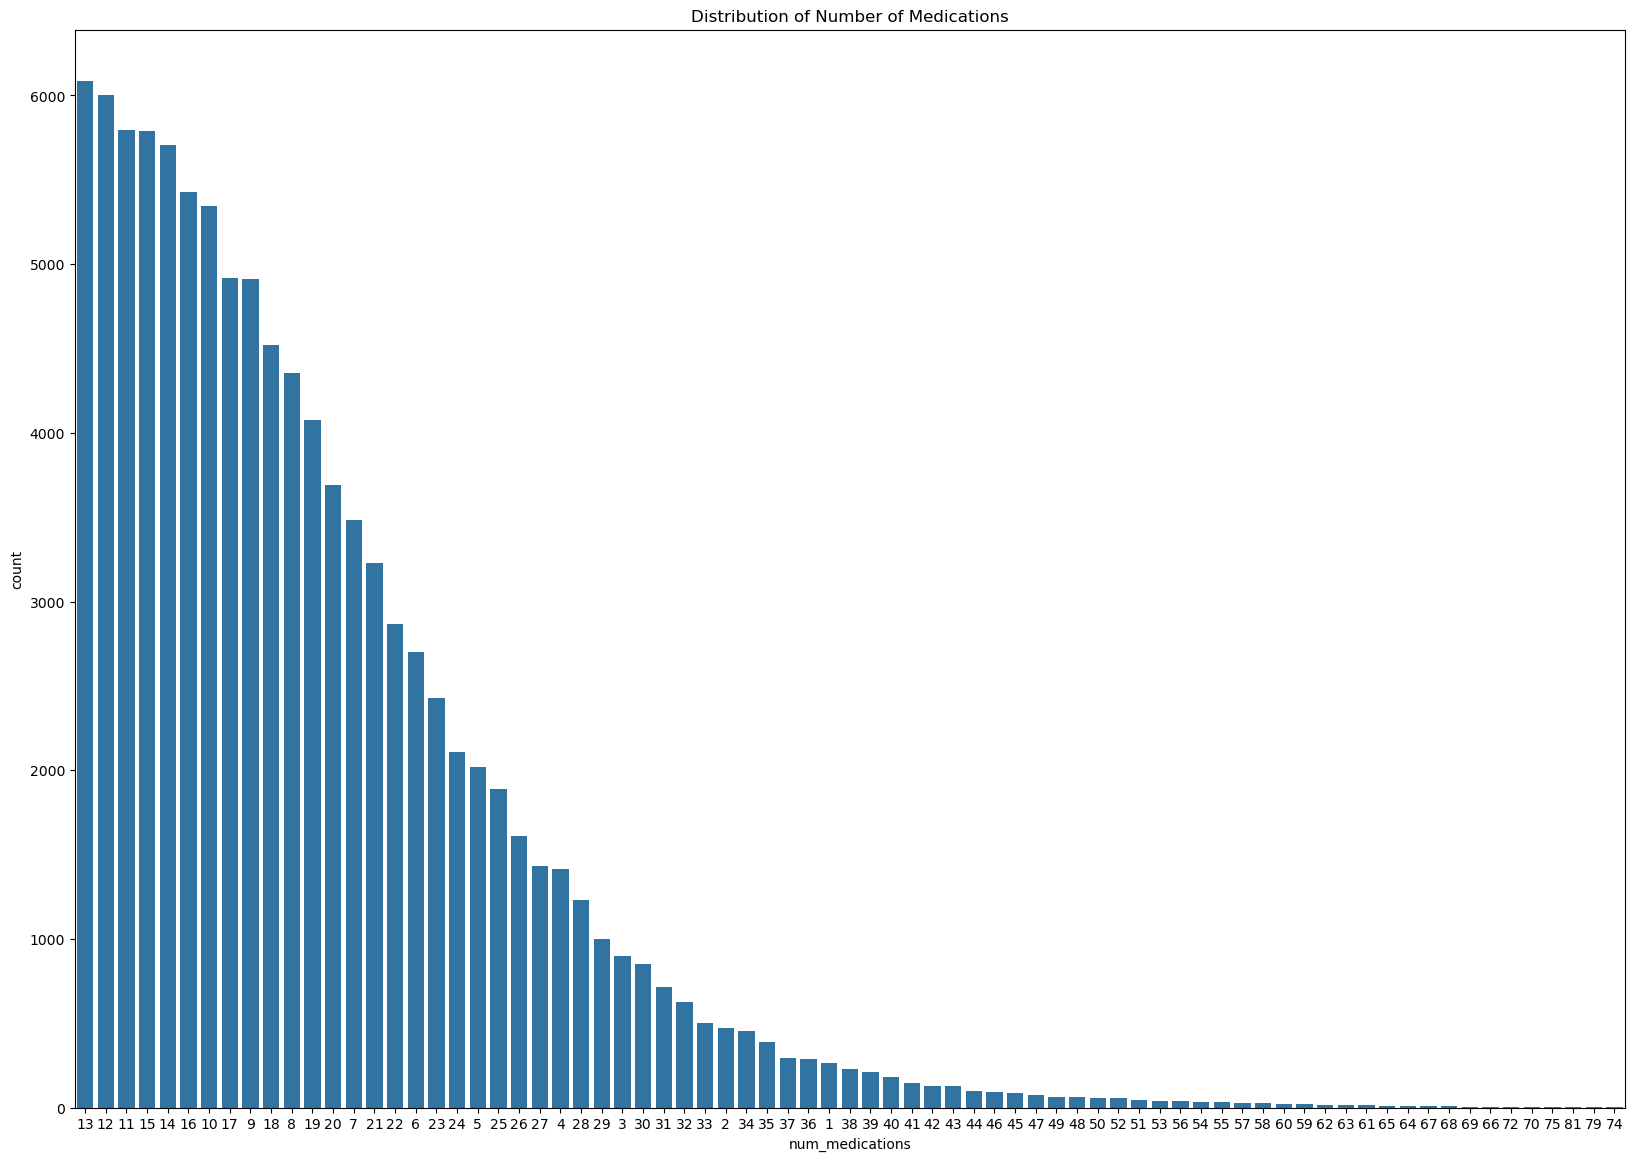

,Total observations,%age of total data
13,6086,5.980563
12,6004,5.899983
11,5795,5.694604
15,5792,5.691656
14,5707,5.608129
...,...,...
70,2,0.001965
75,2,0.001965
81,1,0.000983
79,1,0.000983


In [1250]:
plt.figure(figsize=(20,14))
sns.countplot(x="num_medications", data = df, order = df.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

val_counts(df,"num_medications")

In [1251]:
feature_summary(df,'Unique Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
num_lab_procedures,int64,101763,0,0.0,118,1.0,132.0
num_medications,int64,101763,0,0.0,75,1.0,81.0
number_outpatient,int64,101763,0,0.0,39,0.0,42.0
number_emergency,int64,101763,0,0.0,33,0.0,76.0
number_inpatient,int64,101763,0,0.0,21,0.0,21.0
number_diagnoses,int64,101763,0,0.0,16,1.0,16.0
time_in_hospital,int64,101763,0,0.0,14,1.0,14.0
age,int64,101763,0,0.0,10,5.0,95.0
diag_1,object,101763,0,0.0,9,NaN,NaN
diag_2,object,101763,0,0.0,9,NaN,NaN


## Diabetes medications
There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.
But firstly, lets look at the medications

In [1252]:
# Only one value for theses medications
#df=df.drop(['citoglipton','examide'], axis = 1)

In [1253]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide','citoglipton','examide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

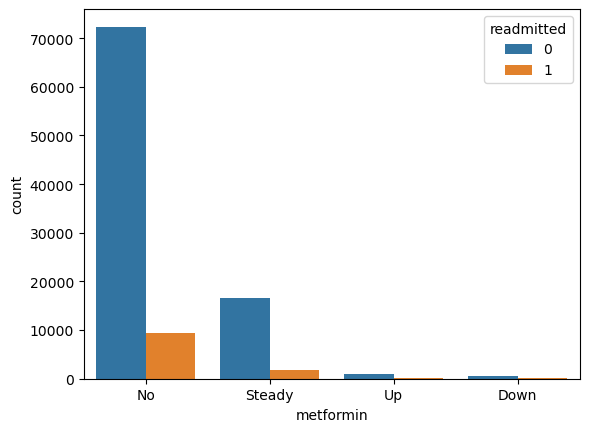

METFORMIN
metformin
No        81776
Steady    18345
Up         1067
Down        575
Name: count, dtype: int64


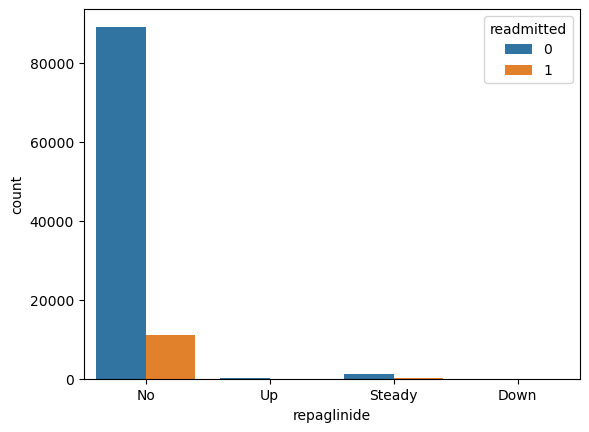

REPAGLINIDE
repaglinide
No        100224
Steady      1384
Up           110
Down          45
Name: count, dtype: int64


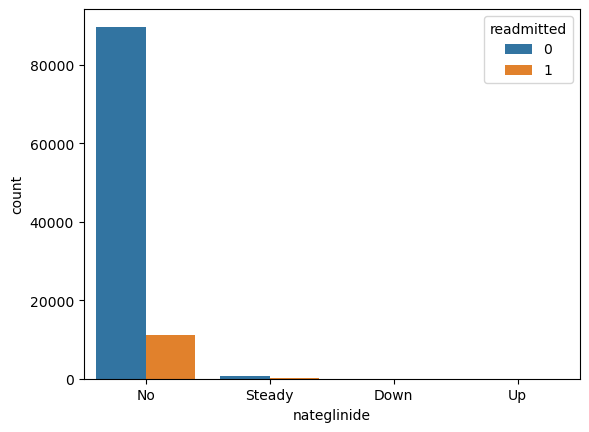

NATEGLINIDE
nateglinide
No        101060
Steady       668
Up            24
Down          11
Name: count, dtype: int64


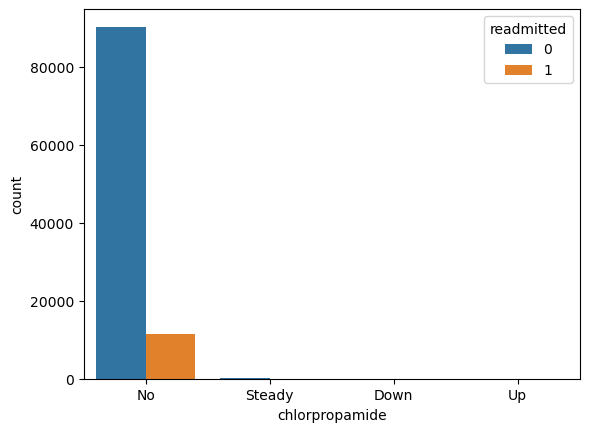

CHLORPROPAMIDE
chlorpropamide
No        101677
Steady        79
Up             6
Down           1
Name: count, dtype: int64


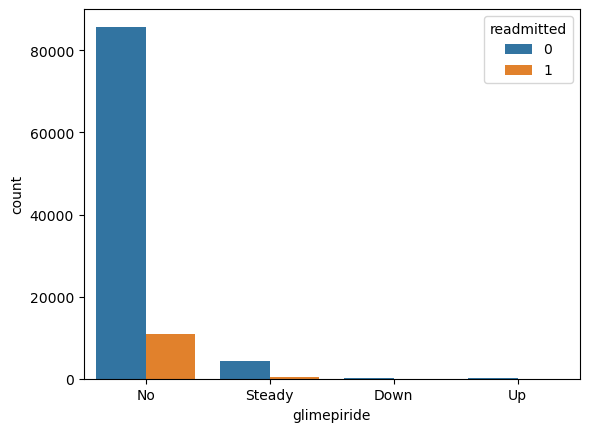

GLIMEPIRIDE
glimepiride
No        96572
Steady     4670
Up          327
Down        194
Name: count, dtype: int64


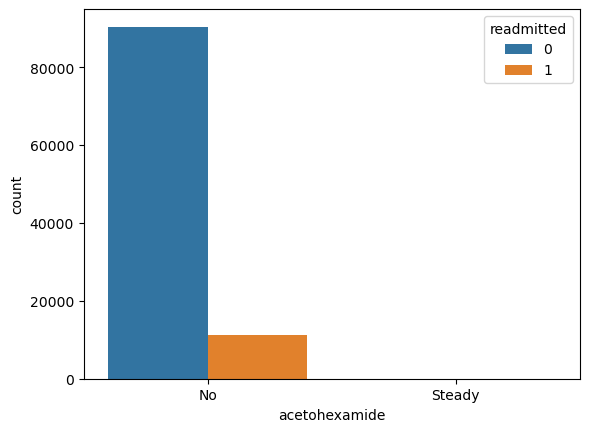

ACETOHEXAMIDE
acetohexamide
No        101762
Steady         1
Name: count, dtype: int64


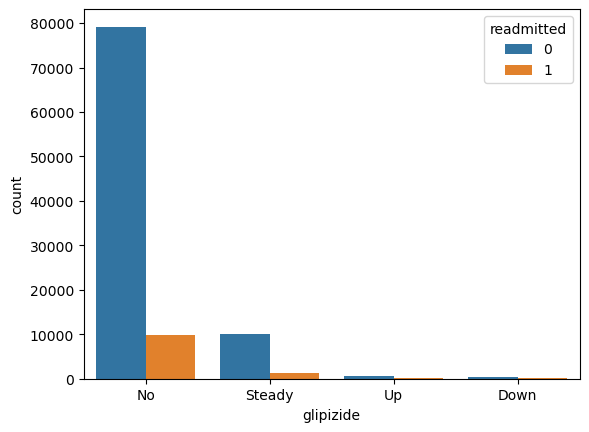

GLIPIZIDE
glipizide
No        89078
Steady    11355
Up          770
Down        560
Name: count, dtype: int64


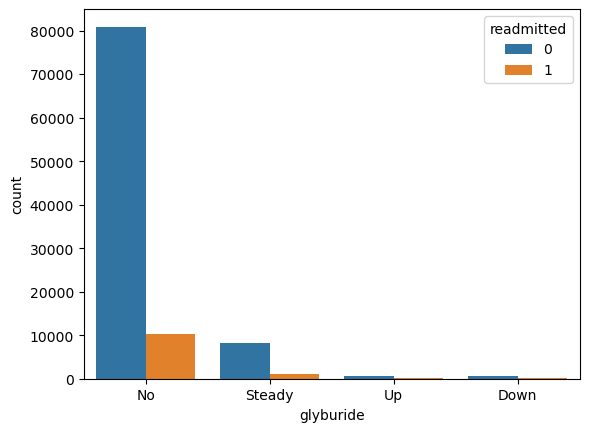

GLYBURIDE
glyburide
No        91113
Steady     9274
Up          812
Down        564
Name: count, dtype: int64


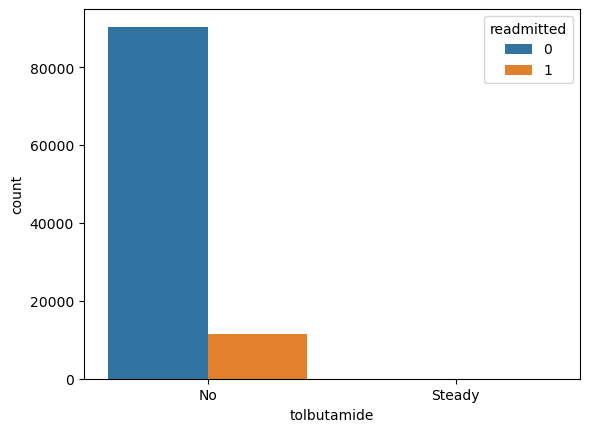

TOLBUTAMIDE
tolbutamide
No        101740
Steady        23
Name: count, dtype: int64


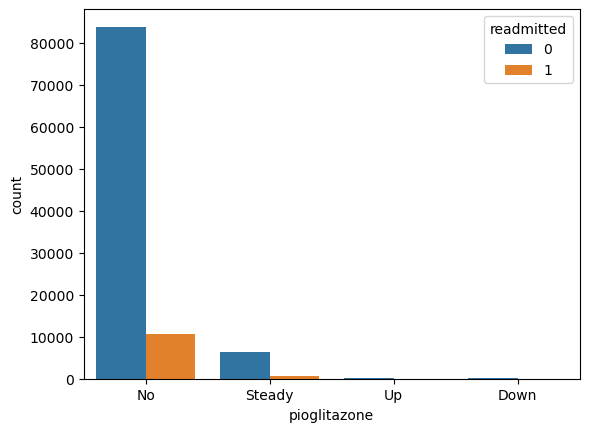

PIOGLITAZONE
pioglitazone
No        94436
Steady     6975
Up          234
Down        118
Name: count, dtype: int64


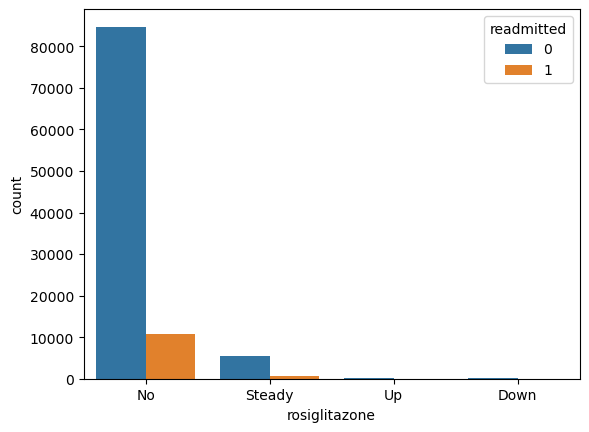

ROSIGLITAZONE
rosiglitazone
No        95399
Steady     6099
Up          178
Down         87
Name: count, dtype: int64


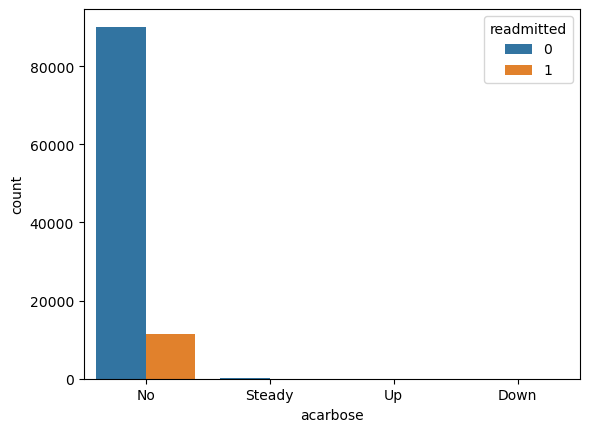

ACARBOSE
acarbose
No        101455
Steady       295
Up            10
Down           3
Name: count, dtype: int64


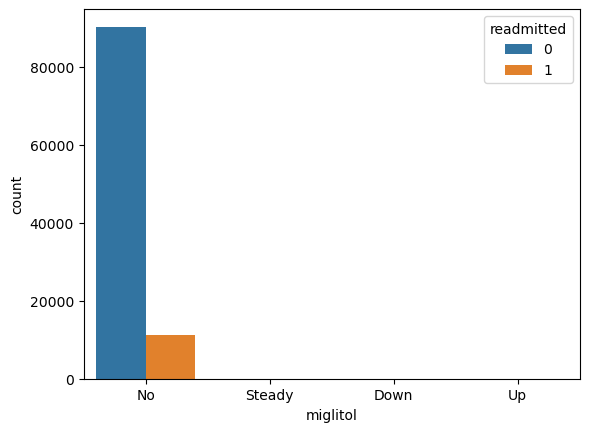

MIGLITOL
miglitol
No        101725
Steady        31
Down           5
Up             2
Name: count, dtype: int64


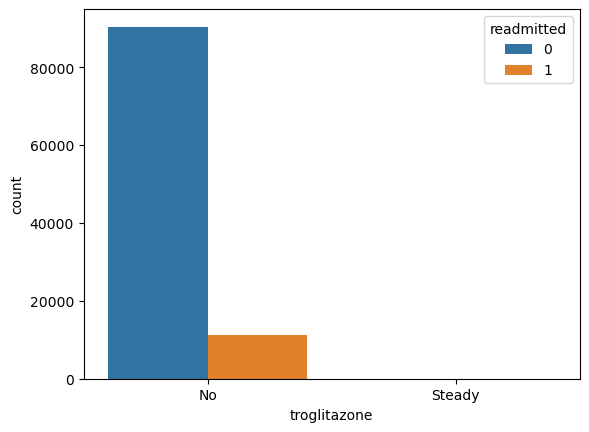

TROGLITAZONE
troglitazone
No        101760
Steady         3
Name: count, dtype: int64


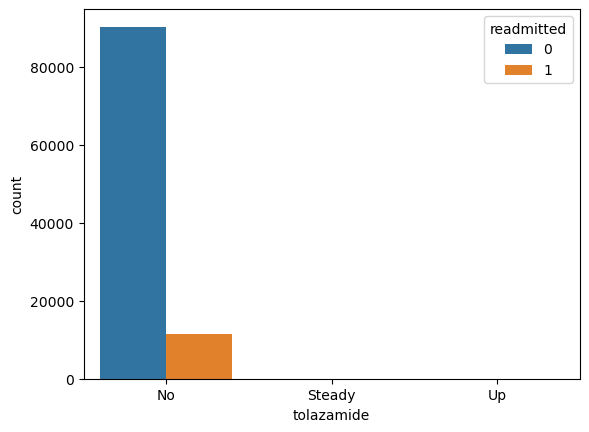

TOLAZAMIDE
tolazamide
No        101724
Steady        38
Up             1
Name: count, dtype: int64


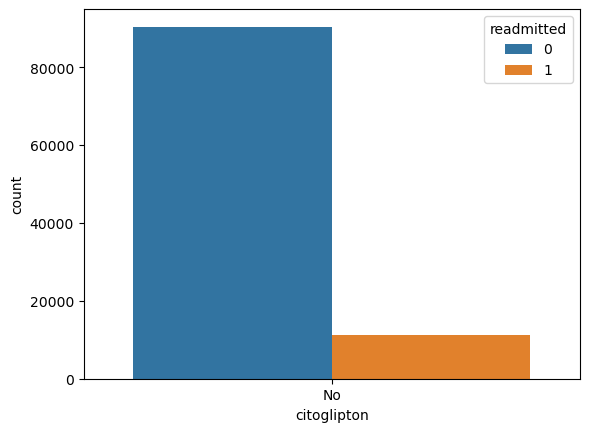

CITOGLIPTON
citoglipton
No    101763
Name: count, dtype: int64


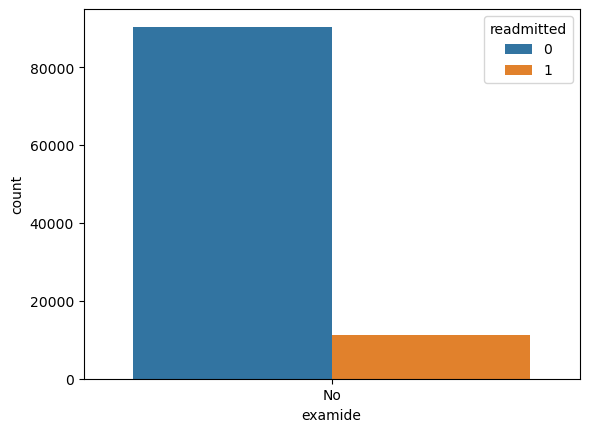

EXAMIDE
examide
No    101763
Name: count, dtype: int64


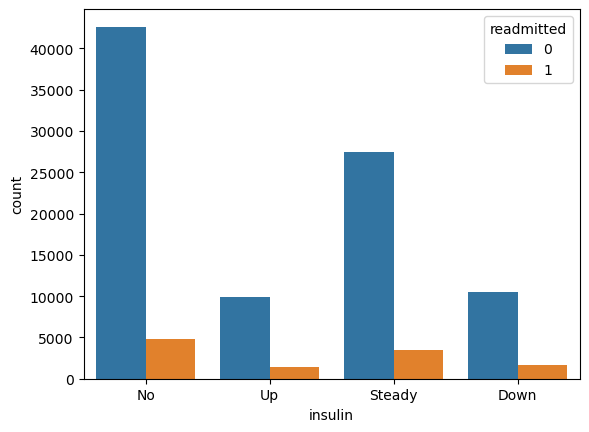

INSULIN
insulin
No        47380
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


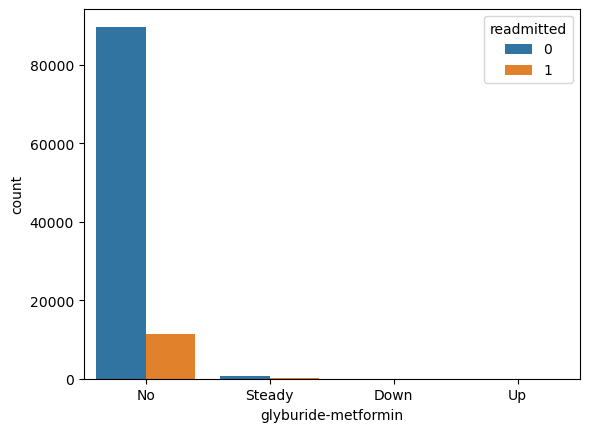

GLYBURIDE-METFORMIN
glyburide-metformin
No        101057
Steady       692
Up             8
Down           6
Name: count, dtype: int64


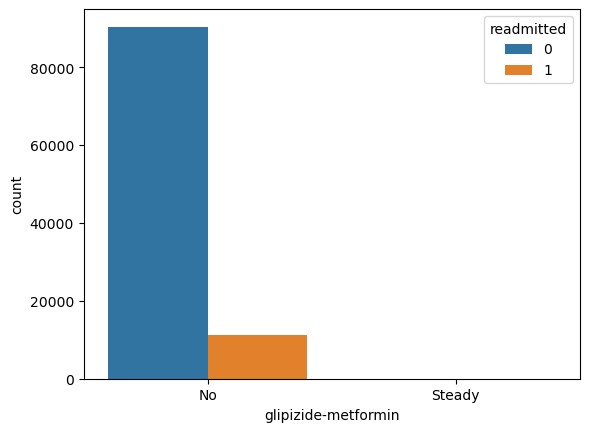

GLIPIZIDE-METFORMIN
glipizide-metformin
No        101750
Steady        13
Name: count, dtype: int64


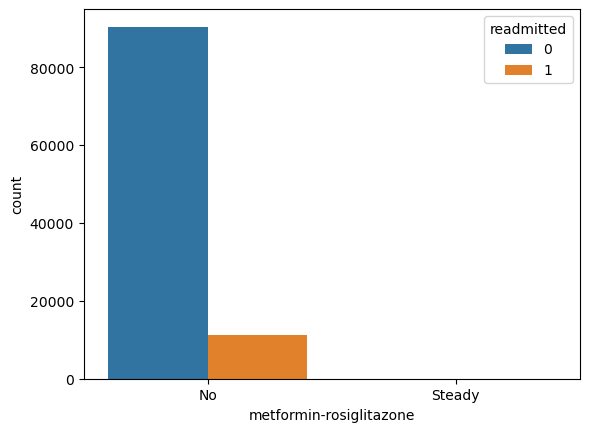

METFORMIN-ROSIGLITAZONE
metformin-rosiglitazone
No        101761
Steady         2
Name: count, dtype: int64


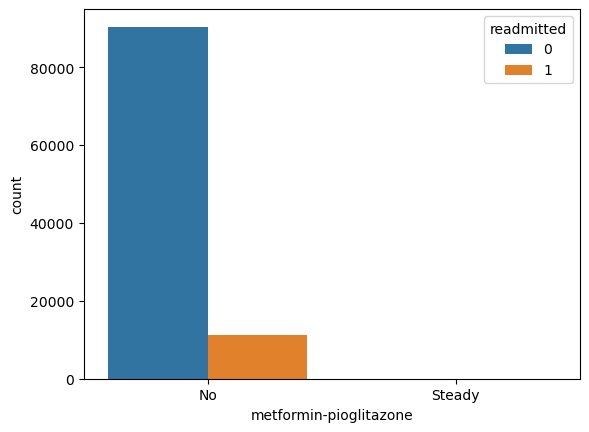

METFORMIN-PIOGLITAZONE
metformin-pioglitazone
No        101762
Steady         1
Name: count, dtype: int64


In [1254]:
def plotdrug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, hue = "readmitted", data = df)
    plt.show()
    print(drug.upper())
    print(df[f"{drug}"].value_counts())
    

plotdrug(drugs)

In [1255]:
feature_summary(df,'Data Type')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
insulin,object,101763,0,0.0,4,NaN,NaN
miglitol,object,101763,0,0.0,4,NaN,NaN
glyburide,object,101763,0,0.0,4,NaN,NaN
glyburide-metformin,object,101763,0,0.0,4,NaN,NaN
acarbose,object,101763,0,0.0,4,NaN,NaN
metformin,object,101763,0,0.0,4,NaN,NaN
metformin-pioglitazone,object,101763,0,0.0,2,NaN,NaN
metformin-rosiglitazone,object,101763,0,0.0,2,NaN,NaN
nateglinide,object,101763,0,0.0,4,NaN,NaN
glipizide,object,101763,0,0.0,4,NaN,NaN


In [1256]:
cat_data = df.select_dtypes('O')

num_data = df.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,repaglinide,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Elective,Discharged to home,Referral,Diabetes,Other,Other,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to home,Emergency,Other,Diabetes,Other,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
2,AfricanAmerican,Female,Emergency,Discharged to home,Emergency,Other,Diabetes,Other,No,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to home,Emergency,Other,Diabetes,Circulatory,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
4,Caucasian,Male,Emergency,Discharged to home,Emergency,Neoplasms,Neoplasms,Diabetes,No,No,...,No,No,Steady,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Discharged to Other,Emergency,Diabetes,Other,Circulatory,Steady,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
101762,AfricanAmerican,Female,Emergency,Discharged to Other,Transfer,Digestive,Other,Digestive,No,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to home,Emergency,Other,Genitourinary,Other,Steady,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
101764,Caucasian,Female,Emergency,Discharged to Other,Emergency,Injury,Other,Injury,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes


In [1257]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [1258]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,1,1


In [1259]:
data.shape

(101763, 45)

In [1260]:
numeric_cols = data.select_dtypes(include=['number']) #.columns
numeric_cols

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,75,3,51,0,16,0,0,0,9,0,...,0,0,0,1,0,0,0,0,1,1
101762,85,5,33,3,18,0,0,1,9,0,...,0,0,2,1,0,0,0,0,0,1
101763,75,1,53,0,9,1,0,0,13,0,...,0,0,0,1,0,0,0,0,1,1
101764,85,10,45,2,21,0,0,1,9,0,...,0,0,3,1,0,0,0,0,1,1


In [1261]:
numeric_cols=numeric_cols.drop('readmitted',axis=1)

In [1262]:
numeric_cols

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,75,3,51,0,16,0,0,0,9,0,...,0,0,0,1,0,0,0,0,1,1
101762,85,5,33,3,18,0,0,1,9,0,...,0,0,2,1,0,0,0,0,0,1
101763,75,1,53,0,9,1,0,0,13,0,...,0,0,0,1,0,0,0,0,1,1
101764,85,10,45,2,21,0,0,1,9,0,...,0,0,3,1,0,0,0,0,1,1


In [1263]:
'''
outlier_dict = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_dict[col] = {
            'count': outliers.shape[0],
            'outlier_values': outliers[col].unique()
        }

'''

"\noutlier_dict = {}\n\nfor col in numeric_cols:\n    Q1 = data[col].quantile(0.25)\n    Q3 = data[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Find outliers\n    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]\n\n    if not outliers.empty:\n        outlier_dict[col] = {\n            'count': outliers.shape[0],\n            'outlier_values': outliers[col].unique()\n        }\n\n"

In [1264]:
'''
for col, details in outlier_dict.items():
    print(f"\nFeature: {col}")
    print(f"  → Outlier count: {details['count']}")
    print(f"  → Outlier values: {sorted(details['outlier_values'])}")
'''

'\nfor col, details in outlier_dict.items():\n    print(f"\nFeature: {col}")\n    print(f"  → Outlier count: {details[\'count\']}")\n    print(f"  → Outlier values: {sorted(details[\'outlier_values\'])}")\n'

In [1265]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [1266]:
#df_no_outliers = remove_outliers_iqr(data, numeric_cols)
df_no_outliers = data

In [1267]:
'''
numeric_cols2 = df_no_outliers.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(len(numeric_cols2) / n_cols)+1
print(n_rows)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))

axs = axs.flatten()

for i, col in enumerate(numeric_cols2):
    axs[i].boxplot(df_no_outliers[col])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()
'''

"\nnumeric_cols2 = df_no_outliers.select_dtypes(include=['number']).columns\n\nn_cols = 3\nn_rows = int(len(numeric_cols2) / n_cols)+1\nprint(n_rows)\nfig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))\n\naxs = axs.flatten()\n\nfor i, col in enumerate(numeric_cols2):\n    axs[i].boxplot(df_no_outliers[col])\n    axs[i].set_title(f'Boxplot of {col}')\n    axs[i].set_ylabel(col)\n\nplt.tight_layout()\nplt.show()\n"

In [1268]:
print("Original shape:", df_original.shape)
print("After scaling and dropping column:", data.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (101766, 50)
After scaling and dropping column: (101763, 45)
After removing outliers: (101763, 45)


In [1269]:
df_no_outliers.to_csv('diabetic_data_cleaned.csv', mode='w',index=False)

### Model Fitting

In [1301]:
df_model = pd.read_csv('diabetic_data_cleaned.csv')

In [1302]:
df_model.shape

(101763, 45)

In [1303]:
X = df_model.drop('readmitted',axis=1)

y = df_model['readmitted']

In [1304]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [1305]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [1306]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((91586, 44), (10177, 44), (91586,), (10177,))

In [1276]:
LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [1277]:
LR.score(X_train_scaled,y_train)

0.888410892494486

In [1278]:
LR.score(X_test_scaled,y_test)

0.8861157512036946

In [1307]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [1308]:
RF.score(X_train_scaled,y_train)

0.9999454065031773

In [1310]:
RF.score(X_test_scaled,y_test)

0.8871966198290262

In [1311]:
y_pred = RF.predict(X_test)

In [1312]:
confusion_matrix(y_test,y_pred)

array([[8958,   73],
       [1110,   36]], dtype=int64)

In [1313]:
accuracy_score(y_test,y_pred)

0.8837574923847892

In [1314]:
print(y_test.shape)
print(y_pred.shape)

(10177,)
(10177,)


In [1315]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9031
           1       0.33      0.03      0.06      1146

    accuracy                           0.88     10177
   macro avg       0.61      0.51      0.50     10177
weighted avg       0.83      0.88      0.84     10177



In [1316]:
import imblearn

from imblearn.over_sampling import SMOTE

In [1318]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [1319]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [1320]:
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RandomForestClassifier()

In [1321]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.999981564554784, 0.8976883088153965)

In [1322]:
y_pred = RF.predict(X_test)

In [1323]:
confusion_matrix(y_test,y_pred)

array([[8319,  782],
       [1068, 7913]], dtype=int64)

In [1324]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      9101
           1       0.91      0.88      0.90      8981

    accuracy                           0.90     18082
   macro avg       0.90      0.90      0.90     18082
weighted avg       0.90      0.90      0.90     18082



## Model Saving

In [1325]:
import joblib
model=RandomForestClassifier()
model.fit(X_train, y_train)
# Save the model
joblib.dump(model, 'RandomF.joblib')

['RandomF.joblib']

## Model Prediction

In [1333]:
user_input1={'age':65,
'time_in_hospital':10,
'num_lab_procedures':60,
'num_procedures':0,
'num_medications':15,
'number_outpatient':0,
'number_emergency':0,
'number_inpatient':0,
'number_diagnoses':9,
'max_glu_serum':0,
'A1Cresult':2,
'race':2,
'gender':0,
'admission_type_id':0,
'discharge_disposition_id':1,
'admission_source_id':0,
'diag_1':0,
'diag_2':1,
'diag_3':0,
'metformin':1,
'repaglinide':1,
'nateglinide':1,
'chlorpropamide':1,
'glimepiride':1,
'acetohexamide':0,
'glipizide':1,
'glyburide':1,
'tolbutamide':0,
'pioglitazone':1,
'rosiglitazone':1,
'acarbose':1,
'miglitol':1,
'troglitazone':0,
'tolazamide':0,
'examide':0,
'citoglipton':0,
'insulin':3,
'glyburide-metformin':1,
'glipizide-metformin':0,
'glimepiride-pioglitazone':0,
'metformin-rosiglitazone':0,
'metformin-pioglitazone':0,
'change':1,
'diabetesMed':1
}

In [1332]:
user_input0={'age':45,
'time_in_hospital':9,
'num_lab_procedures':47,
'num_procedures':2,
'num_medications':17,
'number_outpatient':0,
'number_emergency':0,
'number_inpatient':0,
'number_diagnoses':9,
'max_glu_serum':0,
'A1Cresult':0,
'race':0,
'gender':0,
'admission_type_id':1,
'discharge_disposition_id':1,
'admission_source_id':0,
'diag_1':1,
'diag_2':0,
'diag_3':4,
'metformin':1,
'repaglinide':1,
'nateglinide':1,
'chlorpropamide':1,
'glimepiride':1,
'acetohexamide':0,
'glipizide':1,
'glyburide':1,
'tolbutamide':0,
'pioglitazone':1,
'rosiglitazone':1,
'acarbose':1,
'miglitol':1,
'troglitazone':0,
'tolazamide':0,
'examide':0,
'citoglipton':0,
'insulin':2,
'glyburide-metformin':1,
'glipizide-metformin':0,
'glimepiride-pioglitazone':0,
'metformin-rosiglitazone':0,
'metformin-pioglitazone':0,
'change':0,
'diabetesMed':1,

}

In [1334]:
loaded_model = joblib.load('RandomF.joblib')
input_df = pd.DataFrame([user_input0])


# Prediction
prediction = loaded_model.predict(input_df)[0]
print(prediction)
if prediction == 1:
    print("High risk of readmission within 30 days!")
elif prediction == 0:
    print("Low risk of readmission within 30 days.")

0
Low risk of readmission within 30 days.


In [1335]:
loaded_model = joblib.load('RandomF.joblib')
input_df = pd.DataFrame([user_input1])


# Prediction
prediction = loaded_model.predict(input_df)[0]
print(prediction)
if prediction == 1:
    print("High risk of readmission within 30 days!")
elif prediction == 0:
    print("Low risk of readmission within 30 days.")

1
High risk of readmission within 30 days!


## End of the Model Testing

In [1300]:
import sys
sys.exit()

SystemExit: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
# import various functions from sklearn 


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
# Train and evaluate each model
results = {}

# Define models
models = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Linear Regression": LinearRegression(),
    'Logistic Regression':LogisticRegression(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
   

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print(y_pred)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))


    results[name] = {
        'Accuracy': accuracy,
        'MSE': mse,
        'R2': r2
    }



# Display the results
results_df = pd.DataFrame(results).T #Transpose
print()
print()
print("Results")
print(results_df)

print()
print()
print('Conclusion')
print()
minMSE=min(results_df["MSE"])
maxR2=max(results_df["R2"])
minMSEModel=results_df.loc[results_df['MSE'] == minMSE]
maxR2Model=results_df.loc[results_df['R2'] == maxR2]

max_accuracy_model = max(results, key=lambda name: results[name]['Accuracy'])
max_r2_model = max(results, key=lambda name: results[name]['R2'])
min_MSE_model = min(results, key=lambda name: results[name]['MSE'])


print(f"The model with the highest accuracy is: {max_accuracy_model}")
print(f"The model with the highest R2 is: {max_r2_model}")
print(f"The model with the Lowest MSE is: {min_MSE_model}")
print()
print()



Results
                           Accuracy       MSE        R2
Gradient Boosting          0.530958  0.152161  0.391287
Lasso Regression           0.494743  0.250006 -0.000137
Ridge Regression           0.494743  0.210779  0.156790
Linear Regression          0.494743  0.210779  0.156791
Logistic Regression        0.661799  0.338201 -0.352953
Support Vector Regression  0.511682  0.210636  0.157361
Decision Tree              0.844042  0.155958  0.376099
Random Forest              0.587617  0.070784  0.716834


Conclusion

The model with the highest accuracy is: Decision Tree
The model with the highest R2 is: Random Forest
The model with the Lowest MSE is: Random Forest




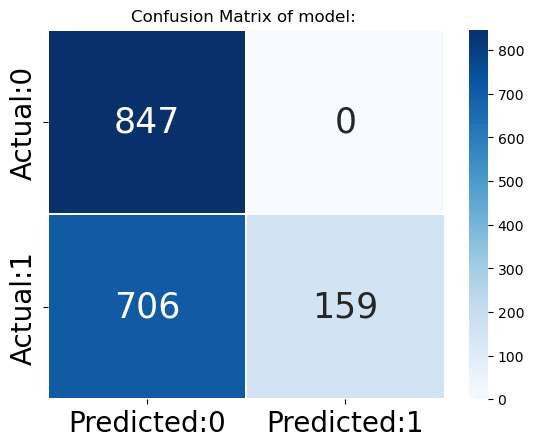

In [ ]:
confusion= confusion_matrix(y_test.astype(int), y_pred.astype(int))

conf_matrix = pd.DataFrame(data = confusion,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
#sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of model: ')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



In [ ]:
stop

NameError: name 'stop' is not defined

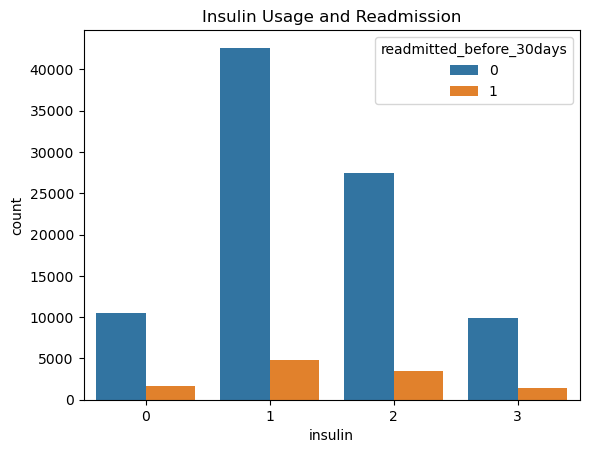

In [ ]:
sns.countplot(x='insulin', hue='readmitted_before_30days', data=df)
plt.title('Insulin Usage and Readmission')
plt.show()


In [ ]:
print("Original shape:", df_original.shape)
print("After scaling and dropping column:", df_s.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (101766, 50)
After scaling and dropping column: (101763, 45)
After removing outliers: (9376, 45)


In [ ]:
#df_no_outliers.to_csv('diabetes_data_cleaned.csv', mode='w',index=False)

data.to_csv('diabetes_data_cleaned.csv', mode='w',index=False)
#df_s.to_csv('diabetes_data_cleaned.csv', mode='w',index=False)

#End of pre processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR

# Split the data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load dataset
df_model = pd.read_csv('diabetes_data_cleaned.csv')

In [ ]:
df_model.shape

(101763, 45)

In [ ]:
X = df_model.drop(columns=['readmitted'])
y = df_model['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((61057, 44), (40706, 44), (61057,), (40706,))

In [ ]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration, linkage_tree
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Train and evaluate each model
results = {}

# Define models
models = {
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Linear Regression": LinearRegression(),
    'Logistic Regression':LogisticRegression(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)

    #print(y_pred)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
    #precision = precision_score(y_test.astype(int), y_pred.astype(int), average='weighted', zero_division=0)
    #recall = recall_score(y_test.astype(int), y_pred.astype(int), average='weighted',zero_division=0)
    #f1 = f1_score(y_test.astype(int), y_pred.astype(int), average='weighted',zero_division=0)

    results[name] = {
        'Accuracy': accuracy,
        'MSE': mse,
        'R2': r2
    }

'''
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
'''

# Display the results
results_df = pd.DataFrame(results).T #Transpose
print()
print()
print("Results")
print(results_df)

print()
print()
print('Conclusion')
print()
minMSE=min(results_df["MSE"])
maxR2=max(results_df["R2"])
minMSEModel=results_df.loc[results_df['MSE'] == minMSE]
maxR2Model=results_df.loc[results_df['R2'] == maxR2]

max_accuracy_model = max(results, key=lambda name: results[name]['Accuracy'])
max_r2_model = max(results, key=lambda name: results[name]['R2'])
min_MSE_model = min(results, key=lambda name: results[name]['MSE'])


print(f"The model with the highest accuracy is: {max_accuracy_model}")
print(f"The model with the highest R2 is: {max_r2_model}")
print(f"The model with the Lowest MSE is: {min_MSE_model}")
print()
print()





Results
                           Accuracy  Precision    Recall  F1 Score       MSE  \
Lasso Regression           0.887142   0.787021  0.887142  0.834088  0.100125   
Ridge Regression           0.885987   0.899913  0.885987  0.833673  0.141922   
Linear Regression          0.885987   0.899913  0.885987  0.833673  0.156727   
Logistic Regression        0.658355   0.832249  0.658355  0.719272  0.341645   
Support Vector Regression  0.887142   0.787021  0.887142  0.834088  0.100255   
Decision Tree              0.204319   0.739844  0.204319  0.221875  0.795681   
Random Forest              0.887142   0.787021  0.887142  0.834088  0.292903   
Gradient Boosting          0.887167   0.847349  0.887167  0.834481  0.178764   

                                 R2  
Lasso Regression          -0.000044  
Ridge Regression          -0.417500  
Linear Regression         -0.565376  
Logistic Regression       -2.412317  
Support Vector Regression -0.001336  
Decision Tree             -6.947187  
Ran

In [ ]:
confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[36112,     0],
       [ 4594,     0]], dtype=int64)

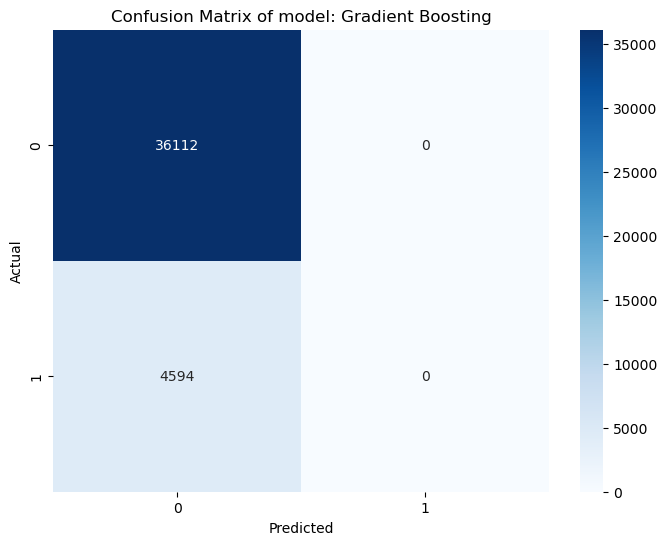

In [ ]:
#plot confudion matrix
for name, model in models.items():
    if name==max_accuracy_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        confusion = confusion_matrix(y_test.astype(int), y_pred.astype(int))

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
        plt.title(f'Confusion Matrix of model: {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
df1=data[data.readmitted==0]

In [ ]:
df1

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,75,3,51,0,16,0,0,0,9,0,...,0,0,0,1,0,0,0,0,1,1
101762,85,5,33,3,18,0,0,1,9,0,...,0,0,2,1,0,0,0,0,0,1
101763,75,1,53,0,9,1,0,0,13,0,...,0,0,0,1,0,0,0,0,1,1
101764,85,10,45,2,21,0,0,1,9,0,...,0,0,3,1,0,0,0,0,1,1


In [ ]:
ui=df1.iloc[10]

In [ ]:
print(ui)

age                         45
time_in_hospital             9
num_lab_procedures          47
num_procedures               2
num_medications             17
number_outpatient            0
number_emergency             0
number_inpatient             0
number_diagnoses             9
max_glu_serum                0
A1Cresult                    0
readmitted                   0
race                         0
gender                       0
admission_type_id            1
discharge_disposition_id     1
admission_source_id          0
diag_1                       1
diag_2                       0
diag_3                       4
metformin                    1
repaglinide                  1
nateglinide                  1
chlorpropamide               1
glimepiride                  1
acetohexamide                0
glipizide                    1
glyburide                    1
tolbutamide                  0
pioglitazone                 1
rosiglitazone                1
acarbose                     1
miglitol